# Importing Libraries, Functions, and Data Frames

In [9]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import nltk
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
from wordcloud import WordCloud, STOPWORDS 
from nltk.collocations import *
import texthero as hero
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
%run -i 'functions/remove_html_tags.py'
%run -i 'functions/omdb_get.py'
%run -i 'functions/lemmatize_token.py'
%run -i 'functions/clean_lemmatize_token_alt.py'

/Users/will4856/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [134]:
building_df = pd.read_csv('/Users/will4856/Downloads/building_csv.csv', index_col = 'Unnamed: 0')
building_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,1,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,1,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...
5,Justice League,2017,300000000,229024295,655945209,355945209,1.19,0,"There he is! Oh, sorry. Superman, Superman, ca..."
7,Spectre,2015,300000000,200074175,879620923,579620923,1.93,1,"Where are you going? I won't be long. Welcome,..."
8,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,1,There was a time above. A time before. There w...
...,...,...,...,...,...,...,...,...,...
5789,Tupac Resurrection,2015,300000,7718961,7808524,7508524,25.03,1,"[I got shot., I always felt like I'd be shot..."
5865,The Stewardesses,2015,200000,13500000,25000000,24800000,124.00,1,[] [] [] [] [] [] [] [] [] [] [] [] [] [] [] [...
5866,Mad Max,2015,200000,8750000,99750000,99550000,497.75,1,"[1, My name is Max., My world is fire and bl..."
5899,She's Gotta Have It,2010,175000,7137502,7137502,6962502,39.79,1,"[I want you to know the only, reason I'm cons..."


# API Call to OMDB

##### Made call to omdbapi.com to get additional title information for data frame. This will help me build a better success or failure metric than just box office success. Used omdb_get function (code in functions folder of this repo) for 500 titles at a time. Any more and I would get a JSON error

In [143]:
film_desc = []

In [144]:
omdb_get(list(building_df['title'][:500]))

In [145]:
len(film_desc)

500

In [146]:
omdb_get(list(building_df['title'][500:1000]))

In [147]:
omdb_get(list(building_df['title'][1000:1500]))

In [148]:
omdb_get(list(building_df['title'][1500:2000]))

In [149]:
omdb_get(list(building_df['title'][2000:2500]))

In [150]:
omdb_get(list(building_df['title'][2500:3000]))

In [151]:
omdb_get(list(building_df['title'][3000:]))

In [10]:
omdb_df = pd.DataFrame(film_desc).drop_duplicates('Title')
omdb_df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons
0,Mission: Impossible,1996,PG-13,22 May 1996,110 min,"Action, Adventure, Thriller",Brian De Palma,"Bruce Geller (television series), David Koepp ...","Tom Cruise, Jon Voight, Emmanuelle Béart, Henr...","An American agent, under false suspicion of di...","English, French, Czech",USA,3 wins & 17 nominations.,https://m.media-amazon.com/images/M/MV5BMTc3Nj...,"[{'Source': 'Internet Movie Database', 'Value'...",59,7.1,"377,541",tt0117060,movie,17 Jan 1998,N/A,Paramount Pictures,N/A,True,NaN,NaN
1,Cloudy With a Chance of Meatballs 2,2013,PG,27 Sep 2013,95 min,"Animation, Adventure, Comedy, Family, Fantasy,...","Cody Cameron, Kris Pearn","Erica Rivinoja (screenplay by), John Francis D...","Bill Hader, Anna Faris, James Caan, Will Forte",Flint Lockwood now works at The Live Corp Comp...,"English, Chinese",USA,16 nominations.,https://m.media-amazon.com/images/M/MV5BMTYzND...,"[{'Source': 'Internet Movie Database', 'Value'...",59,6.4,"87,197",tt1985966,movie,28 Jan 2014,"$119,793,567",Sony Pictures,N/A,True,NaN,NaN
2,Mother,2009,R,28 May 2009,129 min,"Crime, Drama, Thriller",Bong Joon Ho,"Bong Joon Ho (story), Eun-kyo Park (screenplay...","Hye-ja Kim, Won Bin, Goo Jin, Je-mun Yun",A mother desperately searches for the killer w...,Korean,South Korea,40 wins & 46 nominations.,https://m.media-amazon.com/images/M/MV5BMTQzMT...,"[{'Source': 'Internet Movie Database', 'Value'...",79,7.8,"47,019",tt1216496,movie,20 Jul 2010,"$500,000",Magnolia Pictures,N/A,True,NaN,NaN
3,500 Days of Summer,2009,PG-13,07 Aug 2009,95 min,"Comedy, Drama, Romance",Marc Webb,"Scott Neustadter, Michael H. Weber","Joseph Gordon-Levitt, Zooey Deschanel, Geoffre...",An offbeat romantic comedy about a woman who d...,"English, French, Swedish",USA,Nominated for 2 Golden Globes. Another 17 wins...,https://m.media-amazon.com/images/M/MV5BMTk5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",76,7.7,"461,195",tt1022603,movie,22 Dec 2009,"$32,118,648",Fox Searchlight Pictures,N/A,True,NaN,NaN
4,Guardians of the Galaxy Vol. 2,2017,PG-13,05 May 2017,136 min,"Action, Adventure, Comedy, Sci-Fi",James Gunn,"James Gunn, Dan Abnett (based on the Marvel co...","Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",The Guardians struggle to keep together as a t...,English,USA,Nominated for 1 Oscar. Another 15 wins & 56 no...,https://m.media-amazon.com/images/M/MV5BNjM0NT...,"[{'Source': 'Internet Movie Database', 'Value'...",67,7.6,"542,063",tt3896198,movie,22 Aug 2017,"$389,804,217",Walt Disney Pictures,N/A,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,A Farewell to Arms,1932,Unrated,08 Dec 1932,80 min,"Drama, Romance, War",Frank Borzage,"Benjamin Glazer (screenplay), Oliver H.P. Garr...","Helen Hayes, Gary Cooper, Adolphe Menjou, Mary...",An American ambulance driver and an English nu...,English,USA,Won 2 Oscars. Another 1 win & 2 nominations.,https://m.media-amazon.com/images/M/MV5BMzM2OD...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,6.5,"4,746",tt0022879,movie,12 Jun 1998,N/A,Gravitas,N/A,True,NaN,NaN
241,Anders Matthesen: Anden paa coke?,2006,N/A,14 Nov 2006,112 min,Comedy,N/A,Anders Matthesen,Anders Matthesen,Anders Matthesen's one-man show from his 2006 ...,Danish,Denmark,N/A,https://m.media-amazon.com/images/M/MV5BZDliMz...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,7.3,"1,040",tt0949330,movie,N/A,N/A,N/A,N/A,True,NaN,NaN
242,The Last Exorcism Part II: Nell's Story,2013,N/A,01 Mar 2013,3 min,Short,N/A,N/A,N/A,N/A,English,USA,N/A,N/A,[],N/A,N/A,N/A,tt4552696,movie,N/A,N/A,N/A,N/A,True,NaN,NaN
244,El orfanato llega a Hollywood,2007,N/A,14 Dec 2007,39 min,Documentary,Gonzalo Cabrera,Raquel Santos,"Belén Rueda, J.A. Bayona, Geraldine Chaplin, G...",N/A,"English

In [11]:
omdb_df = omdb_df.loc[omdb_df['Title'].notna()]
omdb_df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons
0,Mission: Impossible,1996,PG-13,22 May 1996,110 min,"Action, Adventure, Thriller",Brian De Palma,"Bruce Geller (television series), David Koepp ...","Tom Cruise, Jon Voight, Emmanuelle Béart, Henr...","An American agent, under false suspicion of di...","English, French, Czech",USA,3 wins & 17 nominations.,https://m.media-amazon.com/images/M/MV5BMTc3Nj...,"[{'Source': 'Internet Movie Database', 'Value'...",59,7.1,"377,541",tt0117060,movie,17 Jan 1998,N/A,Paramount Pictures,N/A,True,NaN,NaN
1,Cloudy With a Chance of Meatballs 2,2013,PG,27 Sep 2013,95 min,"Animation, Adventure, Comedy, Family, Fantasy,...","Cody Cameron, Kris Pearn","Erica Rivinoja (screenplay by), John Francis D...","Bill Hader, Anna Faris, James Caan, Will Forte",Flint Lockwood now works at The Live Corp Comp...,"English, Chinese",USA,16 nominations.,https://m.media-amazon.com/images/M/MV5BMTYzND...,"[{'Source': 'Internet Movie Database', 'Value'...",59,6.4,"87,197",tt1985966,movie,28 Jan 2014,"$119,793,567",Sony Pictures,N/A,True,NaN,NaN
2,Mother,2009,R,28 May 2009,129 min,"Crime, Drama, Thriller",Bong Joon Ho,"Bong Joon Ho (story), Eun-kyo Park (screenplay...","Hye-ja Kim, Won Bin, Goo Jin, Je-mun Yun",A mother desperately searches for the killer w...,Korean,South Korea,40 wins & 46 nominations.,https://m.media-amazon.com/images/M/MV5BMTQzMT...,"[{'Source': 'Internet Movie Database', 'Value'...",79,7.8,"47,019",tt1216496,movie,20 Jul 2010,"$500,000",Magnolia Pictures,N/A,True,NaN,NaN
3,500 Days of Summer,2009,PG-13,07 Aug 2009,95 min,"Comedy, Drama, Romance",Marc Webb,"Scott Neustadter, Michael H. Weber","Joseph Gordon-Levitt, Zooey Deschanel, Geoffre...",An offbeat romantic comedy about a woman who d...,"English, French, Swedish",USA,Nominated for 2 Golden Globes. Another 17 wins...,https://m.media-amazon.com/images/M/MV5BMTk5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",76,7.7,"461,195",tt1022603,movie,22 Dec 2009,"$32,118,648",Fox Searchlight Pictures,N/A,True,NaN,NaN
4,Guardians of the Galaxy Vol. 2,2017,PG-13,05 May 2017,136 min,"Action, Adventure, Comedy, Sci-Fi",James Gunn,"James Gunn, Dan Abnett (based on the Marvel co...","Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",The Guardians struggle to keep together as a t...,English,USA,Nominated for 1 Oscar. Another 15 wins & 56 no...,https://m.media-amazon.com/images/M/MV5BNjM0NT...,"[{'Source': 'Internet Movie Database', 'Value'...",67,7.6,"542,063",tt3896198,movie,22 Aug 2017,"$389,804,217",Walt Disney Pictures,N/A,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,A Farewell to Arms,1932,Unrated,08 Dec 1932,80 min,"Drama, Romance, War",Frank Borzage,"Benjamin Glazer (screenplay), Oliver H.P. Garr...","Helen Hayes, Gary Cooper, Adolphe Menjou, Mary...",An American ambulance driver and an English nu...,English,USA,Won 2 Oscars. Another 1 win & 2 nominations.,https://m.media-amazon.com/images/M/MV5BMzM2OD...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,6.5,"4,746",tt0022879,movie,12 Jun 1998,N/A,Gravitas,N/A,True,NaN,NaN
241,Anders Matthesen: Anden paa coke?,2006,N/A,14 Nov 2006,112 min,Comedy,N/A,Anders Matthesen,Anders Matthesen,Anders Matthesen's one-man show from his 2006 ...,Danish,Denmark,N/A,https://m.media-amazon.com/images/M/MV5BZDliMz...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,7.3,"1,040",tt0949330,movie,N/A,N/A,N/A,N/A,True,NaN,NaN
242,The Last Exorcism Part II: Nell's Story,2013,N/A,01 Mar 2013,3 min,Short,N/A,N/A,N/A,N/A,English,USA,N/A,N/A,[],N/A,N/A,N/A,tt4552696,movie,N/A,N/A,N/A,N/A,True,NaN,NaN
244,El orfanato llega a Hollywood,2007,N/A,14 Dec 2007,39 min,Documentary,Gonzalo Cabrera,Raquel Santos,"Belén Rueda, J.A. Bayona, Geraldine Chaplin, G...",N/A,"English

In [197]:
#omdb_df.to_csv('/Users/will4856/Downloads/omdb_df.csv')
omdb_df = pd.read_csv('/Users/will4856/Downloads/omdb_df.csv', index_col = 'Unnamed: 0')
omdb_df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Error
0,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,20 May 2011,136 min,"Action, Adventure, Fantasy",Rob Marshall,"Ted Elliott (screenplay), Terry Rossio (screen...","Johnny Depp, Penélope Cruz, Geoffrey Rush, Ian...",Jack Sparrow and Barbossa embark on a quest to...,"English, Spanish","USA, UK",3 wins & 31 nominations.,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",45.0,6.6,"469,834",tt1298650,movie,18 Oct 2011,"$241,063,875",Walt Disney Pictures,NaN,True,NaN,NaN
1,Avengers: Age of Ultron,2015,PG-13,01 May 2015,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",When Tony Stark and Bruce Banner try to jump-s...,"English, Korean",USA,8 wins & 47 nominations.,https://m.media-amazon.com/images/M/MV5BMTM4OG...,"[{'Source': 'Internet Movie Database', 'Value'...",66.0,7.3,"717,864",tt2395427,movie,02 Oct 2015,"$429,113,729",Walt Disney Pictures,NaN,True,NaN,NaN
2,Justice League,2017,PG-13,17 Nov 2017,120 min,"Action, Adventure, Fantasy, Sci-Fi",Zack Snyder,"Jerry Siegel (Superman created by), Joe Shuste...","Ben Affleck, Henry Cavill, Amy Adams, Gal Gadot",Fueled by his restored faith in humanity and i...,"English, Irish, Russian, Icelandic","USA, Canada, UK",2 wins & 13 nominations.,https://m.media-amazon.com/images/M/MV5BYWVhZj...,"[{'Source': 'Internet Movie Database', 'Value'...",45.0,6.4,"366,384",tt0974015,movie,13 Mar 2018,"$227,032,490",Warner Bros. Pictures,NaN,True,NaN,NaN
3,Spectre,2015,PG-13,06 Nov 2015,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",A cryptic message from James Bond's past sends...,"English, Spanish, Italian, German, French","UK, USA, Austria, Mexico, Italy, Morocco",Won 1 Oscar. Another 7 wins & 34 nominations.,https://m.media-amazon.com/images/M/MV5BOWQ1MD...,"[{'Source': 'Internet Movie Database', 'Value'...",60.0,6.8,"373,270",tt2379713,movie,09 Feb 2016,"$208,777,731",Sony Pictures,NaN,True,NaN,NaN
4,Batman v Superman: Dawn of Justice,2016,PG-13,25 Mar 2016,151 min,"Action, Adventure, Sci-Fi",Zack Snyder,"Chris Terrio, David S. Goyer, Bob Kane (Batman...","Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei...",Fearing that the actions of Superman are left ...,English,USA,14 wins & 33 nominations.,https://m.media-amazon.com/images/M/MV5BYThjYz...,"[{'Source': 'Internet Movie Database', 'Value'...",44.0,6.5,"607,361",tt2975590,movie,19 Jul 2016,"$293,792,936",Warner Bros. Pictures,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,Tupac: Resurrection,2003,R,14 Nov 2003,112 min,"Documentary, Biography, Music",Lauren Lazin,NaN,"Tupac Shakur, Rappin' 4-Tay, Conrad Bain, Bill...","Home movies, photographs, and recited poetry i...",English,USA,Nominated for 1 Oscar. Another 1 win & 5 nomin...,https://m.media-amazon.com/images/M/MV5BMTY4OT...,"[{'Source': 'Internet Movie Database', 'Value'...",66.0,7.9,"8,888",tt0343121,movie,15 Jun 2004,"$7,646,264",Paramount Pictures,NaN,True,NaN,NaN
3093,The Stewardesses,1969,X,25 Jul 1969,93 min,"Comedy, Drama",Al Silliman Jr.,Al Silliman Jr.,"Christina Hart, Ronald South, William Condos, ...",A single eventful night in the lives of a crew...,English,USA,NaN,https://m.media-amazon.com/images/M/MV5BMzIzMj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,3.7,241,tt0168192,movie,27 Jan 2009,NaN,NaN,NaN,True,NaN,NaN
3094,Mad Max,1979,R,21 Mar 1980,88 min,"Action, Adventure, Sci-Fi, Thriller",George Miller,"James McCausland (screenplay), George Miller (...","Mel Gibson, Joanne Samuel, Hugh Keays-Byrne, S...","In a sel

In [198]:
combined_df = building_df.merge(omdb_df, how = 'left', left_on ='title', right_on = 'Title' )
found_df = combined_df.loc[combined_df['Title'].notna()]
missing_df = combined_df.loc[combined_df['Title'].isna()]
missing_df = missing_df[['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
missing_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script
261,Mission: Impossible,2017,80000000,180981886,457697994,377697994,4.72,1,It was good ... ... that you called us. I don'...
295,Cloudy with a Chance of Meatballs 2,2002,78000000,119793567,274392649,196392649,2.52,1,My name is Flint Lockwood. My whole life I alw...
750,mother!,2008,30000000,17800004,42531076,12531076,0.42,0,"Baby? Oh, you scared me. Sorry. Didn't mean to..."
1030,(500) Days of Summer,2007,7500000,32425665,34308515,26808515,3.57,1,## [Whistling] [Pencil Scribbling Rapidly] ## ...
1070,Guardians of the Galaxy Vol 2,2017,200000000,389813101,869113101,669113101,3.35,1,GUARDIANS OF THE GALAXY V...
...,...,...,...,...,...,...,...,...,...
3062,Ong-Bak,2003,1100000,4563167,24062965,22962965,20.88,1,"[Quiet, please!, The winner this year is yo..."
3067,"Hello, My Name is Doris",2008,1000000,14444999,14662703,13662703,13.66,1,"[1, Sometimes, God taketh away, what God hat..."
3076,20 Feet From Stardom,2008,1000000,4946250,5892466,4892466,4.89,1,"[2, It... It's a bit, of a walk, you know,, fr..."
3077,An Inconvenient Sequel,2012,1000000,3496795,5839322,4839322,4.84,1,"[1, Al Gore's movie, An Inconvenient Truth, ..."


In [199]:
missing_omdb = [x.translate(str.maketrans('', '', string.punctuation)) for x in missing_df['title']]
missing_omdb

['Mission Impossible',
 'Cloudy with a Chance of Meatballs 2',
 'mother',
 '500 Days of Summer',
 'Guardians of the Galaxy Vol 2',
 'Angels amp Demons',
 'Battle Los Angeles',
 'How to Lose Friends amp Alienate People',
 'Thirteen Ghosts',
 'Star Wars Ep VII The Force Awakens',
 'Pirates of the Caribbean Dead Manâ\x80\x99s Chest',
 'Star Wars Ep VIII The Last Jedi',
 'Tron Legacy',
 'Prince of Persia Sands of Time',
 'Dark Phoenix',
 'Disneyâ\x80\x99s A Christmas Carol',
 'WALLE',
 'Mission Impossibleâ\x80\x94Fallout',
 'Ralph Breaks The Internet',
 'Fast and Furious 6',
 'The Chronicles of Narnia The Voyage of the Daw…',
 'Terminator Genisys',
 'I am Legend',
 'Mission Impossibleâ\x80\x94Rogue Nation',
 'Mission Impossibleâ\x80\x94Ghost Protocol',
 'Mr Peabody amp Sherman',
 'Men in Black 2',
 'Fun With Dick And Jane',
 'The Twilight Saga Breaking Dawn Part 2',
 'The Twilight Saga Breaking Dawn Part 1',
 'Harry Potter and the Deathly Hallows Part II',
 'Harry Potter and the Sorcererâ\

In [200]:
film_desc = []
omdb_get(missing_omdb)

In [201]:
to_add_df = pd.DataFrame(film_desc)
to_add_df#.loc[to_add_df['Title'].notna()]

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons
0,Mission: Impossible,1996,PG-13,22 May 1996,110 min,"Action, Adventure, Thriller",Brian De Palma,"Bruce Geller (television series), David Koepp ...","Tom Cruise, Jon Voight, Emmanuelle Béart, Henr...","An American agent, under false suspicion of di...","English, French, Czech",USA,3 wins & 17 nominations.,https://m.media-amazon.com/images/M/MV5BMTc3Nj...,"[{'Source': 'Internet Movie Database', 'Value'...",59,7.1,"377,541",tt0117060,movie,17 Jan 1998,N/A,Paramount Pictures,N/A,True,NaN,NaN
1,Cloudy With a Chance of Meatballs 2,2013,PG,27 Sep 2013,95 min,"Animation, Adventure, Comedy, Family, Fantasy,...","Cody Cameron, Kris Pearn","Erica Rivinoja (screenplay by), John Francis D...","Bill Hader, Anna Faris, James Caan, Will Forte",Flint Lockwood now works at The Live Corp Comp...,"English, Chinese",USA,16 nominations.,https://m.media-amazon.com/images/M/MV5BMTYzND...,"[{'Source': 'Internet Movie Database', 'Value'...",59,6.4,"87,197",tt1985966,movie,28 Jan 2014,"$119,793,567",Sony Pictures,N/A,True,NaN,NaN
2,Mother,2009,R,28 May 2009,129 min,"Crime, Drama, Thriller",Bong Joon Ho,"Bong Joon Ho (story), Eun-kyo Park (screenplay...","Hye-ja Kim, Won Bin, Goo Jin, Je-mun Yun",A mother desperately searches for the killer w...,Korean,South Korea,40 wins & 46 nominations.,https://m.media-amazon.com/images/M/MV5BMTQzMT...,"[{'Source': 'Internet Movie Database', 'Value'...",79,7.8,"47,019",tt1216496,movie,20 Jul 2010,"$500,000",Magnolia Pictures,N/A,True,NaN,NaN
3,500 Days of Summer,2009,PG-13,07 Aug 2009,95 min,"Comedy, Drama, Romance",Marc Webb,"Scott Neustadter, Michael H. Weber","Joseph Gordon-Levitt, Zooey Deschanel, Geoffre...",An offbeat romantic comedy about a woman who d...,"English, French, Swedish",USA,Nominated for 2 Golden Globes. Another 17 wins...,https://m.media-amazon.com/images/M/MV5BMTk5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",76,7.7,"461,195",tt1022603,movie,22 Dec 2009,"$32,118,648",Fox Searchlight Pictures,N/A,True,NaN,NaN
4,Guardians of the Galaxy Vol. 2,2017,PG-13,05 May 2017,136 min,"Action, Adventure, Comedy, Sci-Fi",James Gunn,"James Gunn, Dan Abnett (based on the Marvel co...","Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",The Guardians struggle to keep together as a t...,English,USA,Nominated for 1 Oscar. Another 15 wins & 56 no...,https://m.media-amazon.com/images/M/MV5BNjM0NT...,"[{'Source': 'Internet Movie Database', 'Value'...",67,7.6,"542,063",tt3896198,movie,22 Aug 2017,"$389,804,217",Walt Disney Pictures,N/A,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Movie not found!,NaN
261,"Hello, My Name Is Doris",2015,R,01 Apr 2016,90 min,"Comedy, Drama, Romance",Michael Showalter,"Laura Terruso (screenplay), Michael Showalter ...","Sally Field, Edmund Lupinski, Norma Michaels, ...",A self-help seminar inspires a sixty-something...,English,USA,2 wins & 10 nominations.,https://m.media-amazon.com/images/M/MV5BMTg0NT...,"[{'Source': 'Internet Movie Database', 'Value'...",63,6.6,"18,164",tt3766394,movie,14 Jun 2016,"$14,443,077",Red Crown Productions,N/A,True,NaN,NaN
262,20 Feet from Stardom,2013,PG-13,26 Jul 2013,91 min,"Documentary, Biography, Music",Morgan Neville,N/A,"Lou Adler, Stephanie 'Stevvi' Alexander, Patti...",Backup singers live in a world that lies just ...,"English, Spanish",USA,Won 1 Oscar. Another 20 wins & 27 nominations.,https://m.media-amazon.com/images/M/MV5BMTQxND...,"[{'Source': 'Internet Movie Database', 'Value'...",83,7.4,"12,018",tt2396566,movie,14 Jan 2014,N/A,Radius-TWC,N/A,True,NaN,NaN
263,An Inconvenient Sequel: Truth to Power,2017,PG,04 Aug 2017,98 min,Documentary,"Bonni Co

In [202]:
to_add_df = pd.concat([missing_df.reset_index(drop = True), to_add_df.reset_index(drop = True)], axis = 1)
omdb_at_large = to_add_df.loc[to_add_df['Title'].isna()]
to_add_df = to_add_df.loc[to_add_df['Title'].notna()]
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons
0,Mission: Impossible,2017,80000000,180981886,457697994,377697994,4.72,1,It was good ... ... that you called us. I don'...,Mission: Impossible,1996,PG-13,22 May 1996,110 min,"Action, Adventure, Thriller",Brian De Palma,"Bruce Geller (television series), David Koepp ...","Tom Cruise, Jon Voight, Emmanuelle Béart, Henr...","An American agent, under false suspicion of di...","English, French, Czech",USA,3 wins & 17 nominations.,https://m.media-amazon.com/images/M/MV5BMTc3Nj...,"[{'Source': 'Internet Movie Database', 'Value'...",59,7.1,"377,541",tt0117060,movie,17 Jan 1998,N/A,Paramount Pictures,N/A,True,NaN,NaN
1,Cloudy with a Chance of Meatballs 2,2002,78000000,119793567,274392649,196392649,2.52,1,My name is Flint Lockwood. My whole life I alw...,Cloudy With a Chance of Meatballs 2,2013,PG,27 Sep 2013,95 min,"Animation, Adventure, Comedy, Family, Fantasy,...","Cody Cameron, Kris Pearn","Erica Rivinoja (screenplay by), John Francis D...","Bill Hader, Anna Faris, James Caan, Will Forte",Flint Lockwood now works at The Live Corp Comp...,"English, Chinese",USA,16 nominations.,https://m.media-amazon.com/images/M/MV5BMTYzND...,"[{'Source': 'Internet Movie Database', 'Value'...",59,6.4,"87,197",tt1985966,movie,28 Jan 2014,"$119,793,567",Sony Pictures,N/A,True,NaN,NaN
2,mother!,2008,30000000,17800004,42531076,12531076,0.42,0,"Baby? Oh, you scared me. Sorry. Didn't mean to...",Mother,2009,R,28 May 2009,129 min,"Crime, Drama, Thriller",Bong Joon Ho,"Bong Joon Ho (story), Eun-kyo Park (screenplay...","Hye-ja Kim, Won Bin, Goo Jin, Je-mun Yun",A mother desperately searches for the killer w...,Korean,South Korea,40 wins & 46 nominations.,https://m.media-amazon.com/images/M/MV5BMTQzMT...,"[{'Source': 'Internet Movie Database', 'Value'...",79,7.8,"47,019",tt1216496,movie,20 Jul 2010,"$500,000",Magnolia Pictures,N/A,True,NaN,NaN
3,(500) Days of Summer,2007,7500000,32425665,34308515,26808515,3.57,1,## [Whistling] [Pencil Scribbling Rapidly] ## ...,500 Days of Summer,2009,PG-13,07 Aug 2009,95 min,"Comedy, Drama, Romance",Marc Webb,"Scott Neustadter, Michael H. Weber","Joseph Gordon-Levitt, Zooey Deschanel, Geoffre...",An offbeat romantic comedy about a woman who d...,"English, French, Swedish",USA,Nominated for 2 Golden Globes. Another 17 wins...,https://m.media-amazon.com/images/M/MV5BMTk5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",76,7.7,"461,195",tt1022603,movie,22 Dec 2009,"$32,118,648",Fox Searchlight Pictures,N/A,True,NaN,NaN
4,Guardians of the Galaxy Vol 2,2017,200000000,389813101,869113101,669113101,3.35,1,GUARDIANS OF THE GALAXY V...,Guardians of the Galaxy Vol. 2,2017,PG-13,05 May 2017,136 min,"Action, Adventure, Comedy, Sci-Fi",James Gunn,"James Gunn, Dan Abnett (based on the Marvel co...","Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",The Guardians struggle to keep together as a t...,English,USA,Nominated for 1 Oscar. Another 15 wins & 56 no...,https://m.media-amazon.com/images/M/MV5BNjM0NT...,"[{'Source': 'Internet Movie Database', 'Value'...",67,7.6,"542,063",tt3896198,movie,22 Aug 2017,"$389,804,217",Walt Disney Pictures,N/A,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Mr. Smith Goes To Washington,2009,1500000,9000000,9000000,7500000,5.00,1,[The CAPITOL DOME at Washington fades ...,Mr. Smith Goes to Washington,1939,Passed,19 Oct 1939,129 min,"Comedy, Drama",Frank Capra,"Sidney Buchman (screen play), Lewis R. Foster ...","Jean Arthur, James Stewart, Claude Rains, Edwa...",A naive man is appointed to fill a vacancy in ...,English,USA,Won 1 Oscar. Another 5 wins & 16 nominations.,https://m.media-amazon.com

In [203]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)
found_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Error
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,1,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,20 May 2011,136 min,"Action, Adventure, Fantasy",Rob Marshall,"Ted Elliott (screenplay), Terry Rossio (screen...","Johnny Depp, Penélope Cruz, Geoffrey Rush, Ian...",Jack Sparrow and Barbossa embark on a quest to...,"English, Spanish","USA, UK",3 wins & 31 nominations.,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",45,6.6,"469,834",tt1298650,movie,18 Oct 2011,"$241,063,875",Walt Disney Pictures,NaN,True,NaN,NaN
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,1,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,Avengers: Age of Ultron,2015,PG-13,01 May 2015,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",When Tony Stark and Bruce Banner try to jump-s...,"English, Korean",USA,8 wins & 47 nominations.,https://m.media-amazon.com/images/M/MV5BMTM4OG...,"[{'Source': 'Internet Movie Database', 'Value'...",66,7.3,"717,864",tt2395427,movie,02 Oct 2015,"$429,113,729",Walt Disney Pictures,NaN,True,NaN,NaN
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,0,"There he is! Oh, sorry. Superman, Superman, ca...",Justice League,2017,PG-13,17 Nov 2017,120 min,"Action, Adventure, Fantasy, Sci-Fi",Zack Snyder,"Jerry Siegel (Superman created by), Joe Shuste...","Ben Affleck, Henry Cavill, Amy Adams, Gal Gadot",Fueled by his restored faith in humanity and i...,"English, Irish, Russian, Icelandic","USA, Canada, UK",2 wins & 13 nominations.,https://m.media-amazon.com/images/M/MV5BYWVhZj...,"[{'Source': 'Internet Movie Database', 'Value'...",45,6.4,"366,384",tt0974015,movie,13 Mar 2018,"$227,032,490",Warner Bros. Pictures,NaN,True,NaN,NaN
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,1,"Where are you going? I won't be long. Welcome,...",Spectre,2015,PG-13,06 Nov 2015,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",A cryptic message from James Bond's past sends...,"English, Spanish, Italian, German, French","UK, USA, Austria, Mexico, Italy, Morocco",Won 1 Oscar. Another 7 wins & 34 nominations.,https://m.media-amazon.com/images/M/MV5BOWQ1MD...,"[{'Source': 'Internet Movie Database', 'Value'...",60,6.8,"373,270",tt2379713,movie,09 Feb 2016,"$208,777,731",Sony Pictures,NaN,True,NaN,NaN
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,1,There was a time above. A time before. There w...,Batman v Superman: Dawn of Justice,2016,PG-13,25 Mar 2016,151 min,"Action, Adventure, Sci-Fi",Zack Snyder,"Chris Terrio, David S. Goyer, Bob Kane (Batman...","Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei...",Fearing that the actions of Superman are left ...,English,USA,14 wins & 33 nominations.,https://m.media-amazon.com/images/M/MV5BYThjYz...,"[{'Source': 'Internet Movie Database', 'Value'...",44,6.5,"607,361",tt2975590,movie,19 Jul 2016,"$293,792,936",Warner Bros. Pictures,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Mr. Smith Goes To Washington,2009,1500000,9000000,9000000,7500000,5.00,1,[The CAPITOL DOME at Washington fades ...,Mr. Smith Goes to Washington,1939,Passed,19 Oct 1939,129 min,"Comedy, Drama",Frank Capra,"Sidney Buchman (screen play), Lewis R. Foster ...","Jean Arthur, James Stewart, Clau

In [204]:
omdb_at_large = omdb_at_large[['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']].loc[omdb_at_large['script'].notna()]
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script
8,Thirteen Ghosts,2018,19000000,41867960,68467960,49467960,2.60,1,THIRTEEN GHOSTSbyNeal Marshall Stevensbased on...
9,Star Wars Ep. VII: The Force Awakens,2015,306000000,936662225,2068223624,1762223624,5.76,1,[<pre>\r\n\r\n \r\n<b> ...
10,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...
11,Star Wars Ep. VIII: The Last Jedi,2017,200000000,620181382,1332539889,1132539889,5.66,1,"[<p style=""text-align:center;"">STAR WARS: THE ..."
13,Prince of Persia: Sands of Time,2010,200000000,90759676,336359676,136359676,0.68,0,Prince of Persia\nThe Sands of Time\n\nby\nJor...
...,...,...,...,...,...,...,...,...,...
250,Lage Raho Munna Bhai,2017,2700000,2217561,31517561,28817561,10.67,1,"[Whatthe hell!, Hey! Hey!, I need to get my ca..."
251,Sardaar Ji,2015,2700000,0,8200000,5500000,2.04,1,"[Run...Run., I think he ran away., Let's go...."
252,Friday the 13th Part IV: The Final Chapter,2006,2600000,32980880,32980880,30380880,11.68,1,"[I don't want to scare anyone,, but I'm goi..."
258,Saul fia,2014,1700000,1777043,9696537,7996537,4.70,1,[<strong>Sonderkommando:</strong><br/> German...


In [205]:
omdb_at_large['search_title'] = omdb_at_large['title'].map(lambda x: x.replace('amp;', ''))
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
8,Thirteen Ghosts,2018,19000000,41867960,68467960,49467960,2.60,1,THIRTEEN GHOSTSbyNeal Marshall Stevensbased on...,Thirteen Ghosts
9,Star Wars Ep. VII: The Force Awakens,2015,306000000,936662225,2068223624,1762223624,5.76,1,[<pre>\r\n\r\n \r\n<b> ...,Star Wars Ep. VII: The Force Awakens
10,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...,Pirates of the Caribbean: Dead Manâs Chest
11,Star Wars Ep. VIII: The Last Jedi,2017,200000000,620181382,1332539889,1132539889,5.66,1,"[<p style=""text-align:center;"">STAR WARS: THE ...",Star Wars Ep. VIII: The Last Jedi
13,Prince of Persia: Sands of Time,2010,200000000,90759676,336359676,136359676,0.68,0,Prince of Persia\nThe Sands of Time\n\nby\nJor...,Prince of Persia: Sands of Time
...,...,...,...,...,...,...,...,...,...,...
250,Lage Raho Munna Bhai,2017,2700000,2217561,31517561,28817561,10.67,1,"[Whatthe hell!, Hey! Hey!, I need to get my ca...",Lage Raho Munna Bhai
251,Sardaar Ji,2015,2700000,0,8200000,5500000,2.04,1,"[Run...Run., I think he ran away., Let's go....",Sardaar Ji
252,Friday the 13th Part IV: The Final Chapter,2006,2600000,32980880,32980880,30380880,11.68,1,"[I don't want to scare anyone,, but I'm goi...",Friday the 13th Part IV: The Final Chapter
258,Saul fia,2014,1700000,1777043,9696537,7996537,4.70,1,[<strong>Sonderkommando:</strong><br/> German...,Saul fia


In [206]:
omdb_at_large['search_title'] = [x.replace('â\x80\x99',"'") for x in omdb_at_large['title']]

In [207]:
omdb_at_large['search_title'] = [x.replace('â\x80\x94', ' - ') for x in omdb_at_large['title']]

In [208]:
omdb_at_large['search_title'] = [x.replace("Disney's", '') for x in omdb_at_large['title']]

In [209]:
omdb_at_large['search_title'] = [x.replace("WALL-E", 'WALL·E') for x in omdb_at_large['title']]

In [210]:
omdb_at_large['search_title'] = [x.replace("Fast and Furious 6", 'Furious 6') for x in omdb_at_large['title']]

In [211]:
omdb_at_large['search_title'] = [x.replace("2", 'II') for x in omdb_at_large['title']]

In [212]:
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
8,Thirteen Ghosts,2018,19000000,41867960,68467960,49467960,2.60,1,THIRTEEN GHOSTSbyNeal Marshall Stevensbased on...,Thirteen Ghosts
9,Star Wars Ep. VII: The Force Awakens,2015,306000000,936662225,2068223624,1762223624,5.76,1,[<pre>\r\n\r\n \r\n<b> ...,Star Wars Ep. VII: The Force Awakens
10,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...,Pirates of the Caribbean: Dead Manâs Chest
11,Star Wars Ep. VIII: The Last Jedi,2017,200000000,620181382,1332539889,1132539889,5.66,1,"[<p style=""text-align:center;"">STAR WARS: THE ...",Star Wars Ep. VIII: The Last Jedi
13,Prince of Persia: Sands of Time,2010,200000000,90759676,336359676,136359676,0.68,0,Prince of Persia\nThe Sands of Time\n\nby\nJor...,Prince of Persia: Sands of Time
...,...,...,...,...,...,...,...,...,...,...
250,Lage Raho Munna Bhai,2017,2700000,2217561,31517561,28817561,10.67,1,"[Whatthe hell!, Hey! Hey!, I need to get my ca...",Lage Raho Munna Bhai
251,Sardaar Ji,2015,2700000,0,8200000,5500000,2.04,1,"[Run...Run., I think he ran away., Let's go....",Sardaar Ji
252,Friday the 13th Part IV: The Final Chapter,2006,2600000,32980880,32980880,30380880,11.68,1,"[I don't want to scare anyone,, but I'm goi...",Friday the 13th Part IV: The Final Chapter
258,Saul fia,2014,1700000,1777043,9696537,7996537,4.70,1,[<strong>Sonderkommando:</strong><br/> German...,Saul fia


In [213]:
omdb_at_large['search_title'] = [x.replace('"', '') for x in omdb_at_large['title']]

In [214]:
film_desc = []
omdb_get(list(omdb_at_large['search_title']))

In [215]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script
0,Thirteen Ghosts,2018,19000000,41867960,68467960,49467960,2.60,1,THIRTEEN GHOSTSbyNeal Marshall Stevensbased on...
1,Star Wars Ep. VII: The Force Awakens,2015,306000000,936662225,2068223624,1762223624,5.76,1,[<pre>\r\n\r\n \r\n<b> ...
2,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...
3,Star Wars Ep. VIII: The Last Jedi,2017,200000000,620181382,1332539889,1132539889,5.66,1,"[<p style=""text-align:center;"">STAR WARS: THE ..."
4,Prince of Persia: Sands of Time,2010,200000000,90759676,336359676,136359676,0.68,0,Prince of Persia\nThe Sands of Time\n\nby\nJor...
...,...,...,...,...,...,...,...,...,...
122,A Nightmare on Elm Street Part 2: Freddy's Rev...,2002,3000000,21163999,21163999,18163999,6.05,1,"[O K. Take it easy., See you., Turn it down!, ..."
123,Lage Raho Munna Bhai,2017,2700000,2217561,31517561,28817561,10.67,1,"[Whatthe hell!, Hey! Hey!, I need to get my ca..."
124,Sardaar Ji,2015,2700000,0,8200000,5500000,2.04,1,"[Run...Run., I think he ran away., Let's go...."
125,Friday the 13th Part IV: The Final Chapter,2006,2600000,32980880,32980880,30380880,11.68,1,"[I don't want to scare anyone,, but I'm goi..."


In [216]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)
found_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Error
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,1,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,20 May 2011,136 min,"Action, Adventure, Fantasy",Rob Marshall,"Ted Elliott (screenplay), Terry Rossio (screen...","Johnny Depp, Penélope Cruz, Geoffrey Rush, Ian...",Jack Sparrow and Barbossa embark on a quest to...,"English, Spanish","USA, UK",3 wins & 31 nominations.,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",45,6.6,"469,834",tt1298650,movie,18 Oct 2011,"$241,063,875",Walt Disney Pictures,NaN,True,NaN,NaN
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,1,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,Avengers: Age of Ultron,2015,PG-13,01 May 2015,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",When Tony Stark and Bruce Banner try to jump-s...,"English, Korean",USA,8 wins & 47 nominations.,https://m.media-amazon.com/images/M/MV5BMTM4OG...,"[{'Source': 'Internet Movie Database', 'Value'...",66,7.3,"717,864",tt2395427,movie,02 Oct 2015,"$429,113,729",Walt Disney Pictures,NaN,True,NaN,NaN
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,0,"There he is! Oh, sorry. Superman, Superman, ca...",Justice League,2017,PG-13,17 Nov 2017,120 min,"Action, Adventure, Fantasy, Sci-Fi",Zack Snyder,"Jerry Siegel (Superman created by), Joe Shuste...","Ben Affleck, Henry Cavill, Amy Adams, Gal Gadot",Fueled by his restored faith in humanity and i...,"English, Irish, Russian, Icelandic","USA, Canada, UK",2 wins & 13 nominations.,https://m.media-amazon.com/images/M/MV5BYWVhZj...,"[{'Source': 'Internet Movie Database', 'Value'...",45,6.4,"366,384",tt0974015,movie,13 Mar 2018,"$227,032,490",Warner Bros. Pictures,NaN,True,NaN,NaN
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,1,"Where are you going? I won't be long. Welcome,...",Spectre,2015,PG-13,06 Nov 2015,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",A cryptic message from James Bond's past sends...,"English, Spanish, Italian, German, French","UK, USA, Austria, Mexico, Italy, Morocco",Won 1 Oscar. Another 7 wins & 34 nominations.,https://m.media-amazon.com/images/M/MV5BOWQ1MD...,"[{'Source': 'Internet Movie Database', 'Value'...",60,6.8,"373,270",tt2379713,movie,09 Feb 2016,"$208,777,731",Sony Pictures,NaN,True,NaN,NaN
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,1,There was a time above. A time before. There w...,Batman v Superman: Dawn of Justice,2016,PG-13,25 Mar 2016,151 min,"Action, Adventure, Sci-Fi",Zack Snyder,"Chris Terrio, David S. Goyer, Bob Kane (Batman...","Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei...",Fearing that the actions of Superman are left ...,English,USA,14 wins & 33 nominations.,https://m.media-amazon.com/images/M/MV5BYThjYz...,"[{'Source': 'Internet Movie Database', 'Value'...",44,6.5,"607,361",tt2975590,movie,19 Jul 2016,"$293,792,936",Warner Bros. Pictures,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Ong-Bak 2,2011,15000000,102458,7583050,-7416950,-0.49,0,"[In the Buddhist year of 1974 (1421 AD), Dur...",Ong Bak 2,2008,R,04 Dec 2008,98 min,Action,"Tony Jaa, Panna Rittikrai","Tony Jaa (story), Panna Rittikrai (story), Ek ...","Tony Jaa, Sarunyu Wongkrachang, Sorapong Chatr...",A young T

In [217]:
omdb_at_large['search_title'] = [x.split(':')[1] if ':' in x else x for x in omdb_at_large['title']]

In [218]:
omdb_at_large['search_title'] = [x.split(':')[0] if ':' in x else x for x in omdb_at_large['title']]
omdb_at_large['search_title'] = [x.replace('â',"'") for x in omdb_at_large['search_title']]
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
0,Thirteen Ghosts,2018,19000000,41867960,68467960,49467960,2.60,1,THIRTEEN GHOSTSbyNeal Marshall Stevensbased on...,Thirteen Ghosts
1,Star Wars Ep. VII: The Force Awakens,2015,306000000,936662225,2068223624,1762223624,5.76,1,[<pre>\r\n\r\n \r\n<b> ...,Star Wars Ep. VII
2,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...,Pirates of the Caribbean
3,Star Wars Ep. VIII: The Last Jedi,2017,200000000,620181382,1332539889,1132539889,5.66,1,"[<p style=""text-align:center;"">STAR WARS: THE ...",Star Wars Ep. VIII
4,Prince of Persia: Sands of Time,2010,200000000,90759676,336359676,136359676,0.68,0,Prince of Persia\nThe Sands of Time\n\nby\nJor...,Prince of Persia
...,...,...,...,...,...,...,...,...,...,...
122,A Nightmare on Elm Street Part 2: Freddy's Rev...,2002,3000000,21163999,21163999,18163999,6.05,1,"[O K. Take it easy., See you., Turn it down!, ...",A Nightmare on Elm Street Part 2
123,Lage Raho Munna Bhai,2017,2700000,2217561,31517561,28817561,10.67,1,"[Whatthe hell!, Hey! Hey!, I need to get my ca...",Lage Raho Munna Bhai
124,Sardaar Ji,2015,2700000,0,8200000,5500000,2.04,1,"[Run...Run., I think he ran away., Let's go....",Sardaar Ji
125,Friday the 13th Part IV: The Final Chapter,2006,2600000,32980880,32980880,30380880,11.68,1,"[I don't want to scare anyone,, but I'm goi...",Friday the 13th Part IV


In [219]:
film_desc = []
omdb_get(list(omdb_at_large['search_title']))

In [227]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Response,Error,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
6,WALL-E,2008,180000000,223808164,532508025,352508025,1.96,1,EXT. SPACE\n\nFADE IN:\n\nStars.\nThe upbeat ...,True,NaN,WALL·E,2008,G,27 Jun 2008,98 min,"Animation, Adventure, Family, Sci-Fi",Andrew Stanton,"Andrew Stanton (original story by), Pete Docte...","Ben Burtt, Elissa Knight, Jeff Garlin, Fred Wi...","In the distant future, a small waste-collectin...",English,USA,Won 1 Oscar. Another 91 wins & 93 nominations.,https://m.media-amazon.com/images/M/MV5BMjExMT...,"[{'Source': 'Internet Movie Database', 'Value'...",95,8.4,"967,549",tt0910970,movie,18 Nov 2008,"$223,749,872",Walt Disney Pictures,N/A
30,You Don't Mess With the Zohan,2008,90000000,100018837,202910991,112910991,1.25,0,[<pre> \n \nYou don't mess with the Zohan!\n...,True,NaN,You Don't Mess with the Zohan,2008,PG-13,06 Jun 2008,113 min,Comedy,Dennis Dugan,"Adam Sandler, Robert Smigel, Judd Apatow","Adam Sandler, John Turturro, Emmanuelle Chriqu...",An Israeli Special Forces Soldier fakes his de...,"English, Hebrew",USA,2 wins & 2 nominations.,https://m.media-amazon.com/images/M/MV5BMzE2Mz...,"[{'Source': 'Internet Movie Database', 'Value'...",54,5.5,"186,211",tt0960144,movie,07 Oct 2008,"$100,018,837",Sony Pictures,N/A
37,Once Upon a Time...in Hollywood,2019,90000000,142502728,374580405,284580405,3.16,1,[ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ ...,True,NaN,Once Upon a Time... in Hollywood,2019,R,26 Jul 2019,161 min,"Comedy, Drama",Quentin Tarantino,Quentin Tarantino,"Leonardo DiCaprio, Brad Pitt, Margot Robbie, E...",A faded television actor and his stunt double ...,"English, German, Italian, Spanish","USA, UK, China",Won 2 Oscars. Another 126 wins & 344 nominations.,https://m.media-amazon.com/images/M/MV5BOTg4ZT...,"[{'Source': 'Internet Movie Database', 'Value'...",83,7.7,"481,492",tt7131622,movie,22 Nov 2019,N/A,Columbia Pictures,N/A
39,Michael Jackson's This Is It,2008,60000000,72091016,252091016,192091016,3.20,1,"[Michael Jackson's LA Residence, June 25, 20...",True,NaN,All Access: Making Michael Jackson's This Is It,2010,N/A,23 Jan 2010,N/A,Documentary,N/A,N/A,"Alex Al, Michael Bearden, Paul Gongaware, Mich...",A documentary special for VH1 about the making...,English,USA,N/A,N/A,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,8.2,26,tt1570981,movie,N/A,N/A,N/A,N/A
52,The X-Files: I Want to Believe,2007,35000000,20982478,68170792,33170792,0.95,0,"[Give 'em room!, Hold the line, gentlemen! Loo...",True,NaN,The X Files: I Want to Believe,2008,PG-13,25 Jul 2008,104 min,"Crime, Drama, Horror, Mystery, Sci-Fi, Thriller",Chris Carter,"Frank Spotnitz, Chris Carter, Chris Carter (te...","David Duchovny, Gillian Anderson, Amanda Peet,...",Mulder and Scully are called back to duty by t...,"English, Russian, Czech","USA, Canada",N/A,https://m.media-amazon.com/images/M/MV5BOTk5MT...,"[{'Source': 'Internet Movie Database', 'Value'...",47,5.9,"87,573",tt0443701,movie,02 Dec 2008,"$20,847,266",20th Century Fox,N/A
57,The 40 Year-old Virgin,2013,26000000,109449237,176276839,150276839,5.78,1,"[[A Life Of Illusion playing], [alarm buzzin...",True,NaN,The 40-Year-Old Virgin,2005,R,19 Aug 2005,116 min,"Comedy, Romance",Judd Apatow,"Judd Apatow, Steve Carell","Steve Carell, Catherine Keener, Paul Rudd, Rom...","Goaded by his buddies, a nerdy guy who's never...","English, Spanish, Japanese",USA,10 wins & 19 nominations.,https://m.media-amazon.com/images/M/MV5BMTNjYT...,"[{'Source': 'Internet Movie Database', 'Value'...",73,7.1,"382,996",tt0405422,movie,13 Dec 2005,"$109,243,478",Universal Pictures,N/A
82,Where'd You Go Bernadette,2008,20000000,9198356,10078776,-9921224,-0.50,0,[ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ ...,True,NaN,"Where'd You Go, Bernadette",2019,PG-13,16 Aug 2019,1

In [223]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)
found_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Error
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,1,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,20 May 2011,136 min,"Action, Adventure, Fantasy",Rob Marshall,"Ted Elliott (screenplay), Terry Rossio (screen...","Johnny Depp, Penélope Cruz, Geoffrey Rush, Ian...",Jack Sparrow and Barbossa embark on a quest to...,"English, Spanish","USA, UK",3 wins & 31 nominations.,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",45,6.6,"469,834",tt1298650,movie,18 Oct 2011,"$241,063,875",Walt Disney Pictures,NaN,True,NaN,NaN
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,1,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,Avengers: Age of Ultron,2015,PG-13,01 May 2015,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",When Tony Stark and Bruce Banner try to jump-s...,"English, Korean",USA,8 wins & 47 nominations.,https://m.media-amazon.com/images/M/MV5BMTM4OG...,"[{'Source': 'Internet Movie Database', 'Value'...",66,7.3,"717,864",tt2395427,movie,02 Oct 2015,"$429,113,729",Walt Disney Pictures,NaN,True,NaN,NaN
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,0,"There he is! Oh, sorry. Superman, Superman, ca...",Justice League,2017,PG-13,17 Nov 2017,120 min,"Action, Adventure, Fantasy, Sci-Fi",Zack Snyder,"Jerry Siegel (Superman created by), Joe Shuste...","Ben Affleck, Henry Cavill, Amy Adams, Gal Gadot",Fueled by his restored faith in humanity and i...,"English, Irish, Russian, Icelandic","USA, Canada, UK",2 wins & 13 nominations.,https://m.media-amazon.com/images/M/MV5BYWVhZj...,"[{'Source': 'Internet Movie Database', 'Value'...",45,6.4,"366,384",tt0974015,movie,13 Mar 2018,"$227,032,490",Warner Bros. Pictures,NaN,True,NaN,NaN
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,1,"Where are you going? I won't be long. Welcome,...",Spectre,2015,PG-13,06 Nov 2015,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",A cryptic message from James Bond's past sends...,"English, Spanish, Italian, German, French","UK, USA, Austria, Mexico, Italy, Morocco",Won 1 Oscar. Another 7 wins & 34 nominations.,https://m.media-amazon.com/images/M/MV5BOWQ1MD...,"[{'Source': 'Internet Movie Database', 'Value'...",60,6.8,"373,270",tt2379713,movie,09 Feb 2016,"$208,777,731",Sony Pictures,NaN,True,NaN,NaN
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,1,There was a time above. A time before. There w...,Batman v Superman: Dawn of Justice,2016,PG-13,25 Mar 2016,151 min,"Action, Adventure, Sci-Fi",Zack Snyder,"Chris Terrio, David S. Goyer, Bob Kane (Batman...","Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei...",Fearing that the actions of Superman are left ...,English,USA,14 wins & 33 nominations.,https://m.media-amazon.com/images/M/MV5BYThjYz...,"[{'Source': 'Internet Movie Database', 'Value'...",44,6.5,"607,361",tt2975590,movie,19 Jul 2016,"$293,792,936",Warner Bros. Pictures,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Ong-Bak 2,2011,15000000,102458,7583050,-7416950,-0.49,0,"[In the Buddhist year of 1974 (1421 AD), Dur...",Ong Bak 2,2008,R,04 Dec 2008,98 min,Action,"Tony Jaa, Panna Rittikrai","Tony Jaa (story), Panna Rittikrai (story), Ek ...","Tony Jaa, Sarunyu Wongkrachang, Sorapong Chatr...",A young T

In [230]:
#omdb_at_large['search_title'] = [x.split(':')[1] if ':' in x else x for x in omdb_at_large['title']]
omdb_at_large['search_title'] = [x.replace('â',"'") for x in omdb_at_large['title']]
#omdb_at_large['search_title'] = [x.replace('â',"'") for x in omdb_at_large['title']]

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
0,Thirteen Ghosts,2018,19000000,41867960,68467960,49467960,2.60,1,THIRTEEN GHOSTSbyNeal Marshall Stevensbased on...,Thirteen Ghosts
1,Star Wars Ep. VII: The Force Awakens,2015,306000000,936662225,2068223624,1762223624,5.76,1,[<pre>\r\n\r\n \r\n<b> ...,Star Wars Ep. VII: The Force Awakens
2,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...,Pirates of the Caribbean: Dead Man's Chest
3,Star Wars Ep. VIII: The Last Jedi,2017,200000000,620181382,1332539889,1132539889,5.66,1,"[<p style=""text-align:center;"">STAR WARS: THE ...",Star Wars Ep. VIII: The Last Jedi
4,Prince of Persia: Sands of Time,2010,200000000,90759676,336359676,136359676,0.68,0,Prince of Persia\nThe Sands of Time\n\nby\nJor...,Prince of Persia: Sands of Time
5,Disneyâs A Christmas Carol,2009,190000000,137855863,315709697,125709697,0.66,0,Scripts.com\n\nA Christmas Carol\n\nBy Robert ...,Disney's A Christmas Carol
7,Mission: ImpossibleâFallout,2018,178000000,220159104,787456552,609456552,3.42,1,"[<div class=""full-script""><br/>Subtitles by ex...",Mission: Impossible'Fallout
8,Fast and Furious 6,2013,160000000,238679850,789300444,629300444,3.93,1,Scripts.com\n\nFast and Furious 6\n\nBy Chris ...,Fast and Furious 6
9,The Chronicles of Narnia: The Voyage of the Daw…,2010,155000000,104386950,418186950,263186950,1.70,1,Scripts.com\n\nThe Chronicles of Narnia:\nThe ...,The Chronicles of Narnia: The Voyage of the Daw…
10,Mission: ImpossibleâRogue Nation,2015,150000000,195042377,688858992,538858992,3.59,1,Scripts.com\n\nMission: Impossible -\nRogue Na...,Mission: Impossible'Rogue Nation


In [231]:
film_desc = []
omdb_get(list(omdb_at_large['search_title']))

In [233]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
df
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Response,Error,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
6,Mission: ImpossibleâFallout,2018,178000000,220159104,787456552,609456552,3.42,1,"[<div class=""full-script""><br/>Subtitles by ex...",True,NaN,Mission: Impossible - Fallout,2018,PG-13,27 Jul 2018,147 min,"Action, Adventure, Thriller",Christopher McQuarrie,Bruce Geller (based on the television series c...,"Tom Cruise, Henry Cavill, Ving Rhames, Simon Pegg","Ethan Hunt and his IMF team, along with some f...","English, French","USA, China, France, Norway, UK",Nominated for 1 BAFTA Film Award. Another 24 w...,https://m.media-amazon.com/images/M/MV5BNjRlZm...,"[{'Source': 'Internet Movie Database', 'Value'...",86,7.7,"275,952",tt4912910,movie,04 Dec 2018,N/A,Paramount Pictures,N/A
9,Mission: ImpossibleâRogue Nation,2015,150000000,195042377,688858992,538858992,3.59,1,Scripts.com\n\nMission: Impossible -\nRogue Na...,True,NaN,Mission: Impossible - Rogue Nation,2015,PG-13,31 Jul 2015,131 min,"Action, Adventure, Thriller",Christopher McQuarrie,"Christopher McQuarrie (screenplay), Christophe...","Tom Cruise, Jeremy Renner, Simon Pegg, Rebecca...",Ethan and his team take on their most impossib...,"Russian, English, Swedish, German","USA, China, Hong Kong, Austria, UK, Morocco",6 wins & 24 nominations.,https://m.media-amazon.com/images/M/MV5BOTFmND...,"[{'Source': 'Internet Movie Database', 'Value'...",75,7.4,"331,995",tt2381249,movie,15 Dec 2015,"$154,979,949",Paramount Pictures,N/A
10,Mission: ImpossibleâGhost Protocol,2011,145000000,209397903,694713230,549713230,3.79,1,Scripts.com\n\nMission: Impossible -\nGhost Pr...,True,NaN,Mission: Impossible - Ghost Protocol,2011,PG-13,21 Dec 2011,132 min,"Action, Adventure, Thriller",Brad Bird,"Bruce Geller (television series ""Mission: Impo...","Tom Cruise, Paula Patton, Simon Pegg, Jeremy R...",The IMF is shut down when it's implicated in t...,"English, Russian, French, Arabic, Swedish","USA, United Arab Emirates, Czech Republic, Ind...",5 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BMTY4MT...,"[{'Source': 'Internet Movie Database', 'Value'...",73,7.4,"446,983",tt1229238,movie,17 Apr 2012,"$209,364,921",Paramount Studios,N/A


In [234]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)

In [241]:
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script
0,Thirteen Ghosts,2018,19000000,41867960,68467960,49467960,2.60,1,THIRTEEN GHOSTSbyNeal Marshall Stevensbased on...
1,Star Wars Ep. VII: The Force Awakens,2015,306000000,936662225,2068223624,1762223624,5.76,1,[<pre>\r\n\r\n \r\n<b> ...
2,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...
3,Star Wars Ep. VIII: The Last Jedi,2017,200000000,620181382,1332539889,1132539889,5.66,1,"[<p style=""text-align:center;"">STAR WARS: THE ..."
4,Prince of Persia: Sands of Time,2010,200000000,90759676,336359676,136359676,0.68,0,Prince of Persia\nThe Sands of Time\n\nby\nJor...
...,...,...,...,...,...,...,...,...,...
111,A Nightmare on Elm Street Part 2: Freddy's Rev...,2002,3000000,21163999,21163999,18163999,6.05,1,"[O K. Take it easy., See you., Turn it down!, ..."
112,Lage Raho Munna Bhai,2017,2700000,2217561,31517561,28817561,10.67,1,"[Whatthe hell!, Hey! Hey!, I need to get my ca..."
113,Sardaar Ji,2015,2700000,0,8200000,5500000,2.04,1,"[Run...Run., I think he ran away., Let's go...."
114,Friday the 13th Part IV: The Final Chapter,2006,2600000,32980880,32980880,30380880,11.68,1,"[I don't want to scare anyone,, but I'm goi..."


In [248]:
omdb_at_large['search_title'] = [x.split(':')[1] if ':' in x else x for x in omdb_at_large['title']]
omdb_at_large['search_title'] = [x.replace('â',"'") for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.replace('amp;',"") for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.replace('2',"II") for x in omdb_at_large['search_title']]
omdb_at_large[:10]

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
0,Thirteen Ghosts,2018,19000000,41867960,68467960,49467960,2.60,1,THIRTEEN GHOSTSbyNeal Marshall Stevensbased on...,Thirteen Ghosts
1,Star Wars Ep. VII: The Force Awakens,2015,306000000,936662225,2068223624,1762223624,5.76,1,[<pre>\r\n\r\n \r\n<b> ...,The Force Awakens
2,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...,Dead Man's Chest
3,Star Wars Ep. VIII: The Last Jedi,2017,200000000,620181382,1332539889,1132539889,5.66,1,"[<p style=""text-align:center;"">STAR WARS: THE ...",The Last Jedi
4,Prince of Persia: Sands of Time,2010,200000000,90759676,336359676,136359676,0.68,0,Prince of Persia\nThe Sands of Time\n\nby\nJor...,Sands of Time
5,Disneyâs A Christmas Carol,2009,190000000,137855863,315709697,125709697,0.66,0,Scripts.com\n\nA Christmas Carol\n\nBy Robert ...,Disney's A Christmas Carol
7,Fast and Furious 6,2013,160000000,238679850,789300444,629300444,3.93,1,Scripts.com\n\nFast and Furious 6\n\nBy Chris ...,Fast and Furious 6
8,The Chronicles of Narnia: The Voyage of the Daw…,2010,155000000,104386950,418186950,263186950,1.70,1,Scripts.com\n\nThe Chronicles of Narnia:\nThe ...,The Voyage of the Daw…
11,Mr. Peabody &amp; Sherman,2014,145000000,111506430,269806430,124806430,0.86,0,Scripts.com\n\nMr. Peabody & Sherman\n\nBy Cra...,Mr. Peabody & Sherman
12,Men in Black 2,2002,140000000,190418803,441767803,301767803,2.16,1,[<pre>\n\n \n\n \n\nMysterie...,Men in Black II


In [249]:
film_desc = []
omdb_get(list(omdb_at_large['search_title'])[:10])

In [251]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
df
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Response,Error,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
1,Star Wars Ep. VII: The Force Awakens,2015,306000000,936662225,2068223624,1762223624,5.76,1,[<pre>\r\n\r\n \r\n<b> ...,True,NaN,Star Wars: Episode VII - The Force Awakens,2015,PG-13,18 Dec 2015,138 min,"Action, Adventure, Sci-Fi",J.J. Abrams,"Lawrence Kasdan, J.J. Abrams, Michael Arndt, G...","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...","As a new threat to the galaxy rises, Rey, a de...",English,USA,Nominated for 5 Oscars. Another 62 wins & 126 ...,https://m.media-amazon.com/images/M/MV5BOTAzOD...,"[{'Source': 'Internet Movie Database', 'Value'...",80,7.9,"841,027",tt2488496,movie,05 Apr 2016,"$936,658,640",Walt Disney Pictures,N/A
3,Star Wars Ep. VIII: The Last Jedi,2017,200000000,620181382,1332539889,1132539889,5.66,1,"[<p style=""text-align:center;"">STAR WARS: THE ...",True,NaN,Star Wars: Episode VIII - The Last Jedi,2017,PG-13,15 Dec 2017,152 min,"Action, Adventure, Fantasy, Sci-Fi",Rian Johnson,"Rian Johnson, George Lucas (based on character...","Mark Hamill, Carrie Fisher, Adam Driver, Daisy...",Rey develops her newly discovered abilities wi...,English,USA,Nominated for 4 Oscars. Another 24 wins & 90 n...,https://m.media-amazon.com/images/M/MV5BMjQ1Mz...,"[{'Source': 'Internet Movie Database', 'Value'...",84,7.0,"542,236",tt2527336,movie,27 Mar 2018,"$619,117,636",Walt Disney Pictures,N/A
4,Prince of Persia: Sands of Time,2010,200000000,90759676,336359676,136359676,0.68,0,Prince of Persia\nThe Sands of Time\n\nby\nJor...,True,NaN,Prince of Persia: The Sands of Time,2010,PG-13,28 May 2010,116 min,"Action, Adventure, Fantasy",Mike Newell,"Boaz Yakin (screenplay), Doug Miro (screenplay...","Jake Gyllenhaal, Gemma Arterton, Ben Kingsley,...",A young fugitive prince and princess must stop...,English,USA,1 win & 11 nominations.,https://m.media-amazon.com/images/M/MV5BMTMwND...,"[{'Source': 'Internet Movie Database', 'Value'...",50,6.6,"266,378",tt0473075,movie,14 Sep 2010,"$90,755,643",Walt Disney Pictures,N/A
8,Mr. Peabody &amp; Sherman,2014,145000000,111506430,269806430,124806430,0.86,0,Scripts.com\n\nMr. Peabody & Sherman\n\nBy Cra...,True,NaN,Mr. Peabody & Sherman,2014,PG,07 Mar 2014,92 min,"Animation, Adventure, Comedy, Family, Sci-Fi",Rob Minkoff,"Jay Ward (based on the series produced by), Cr...","Ty Burrell, Max Charles, Lauri Fraser, Guillau...",The time-travelling adventures of an advanced ...,English,USA,2 wins & 16 nominations.,https://m.media-amazon.com/images/M/MV5BMTkxMz...,"[{'Source': 'Internet Movie Database', 'Value'...",59,6.8,"60,275",tt0864835,movie,14 Oct 2014,"$101,784,999",20th Century Fox,N/A
9,Men in Black 2,2002,140000000,190418803,441767803,301767803,2.16,1,[<pre>\n\n \n\n \n\nMysterie...,True,NaN,Men in Black II,2002,PG-13,03 Jul 2002,88 min,"Action, Adventure, Comedy, Mystery, Sci-Fi",Barry Sonnenfeld,"Lowell Cunningham (comic book ""Malibu Comics"")...","Tommy Lee Jones, Will Smith, Rip Torn, Lara Fl...",Agent J is sent to find Agent K and restore hi...,English,USA,4 wins & 16 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxND...,"[{'Source': 'Internet Movie Database', 'Value'...",49,6.2,"334,850",tt0120912,movie,26 Nov 2002,"$190,400,000",Columbia Pictures,N/A


In [252]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)

In [269]:
omdb_at_large['search_title'] = [x.split(':')[1] if ':' in x else x for x in omdb_at_large['title']]
omdb_at_large['search_title'] = [x.replace('Thirteen',"13") for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.replace('â',"'") for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.replace("Disney's "," ") for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.replace("Fast and Furious 6","Furious 6") for x in omdb_at_large['search_title']]
omdb_at_large[:4]

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
0,Thirteen Ghosts,2018,19000000,41867960,68467960,49467960,2.60,1,THIRTEEN GHOSTSbyNeal Marshall Stevensbased on...,13 Ghosts
2,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...,Dead Man's Chest
5,Disneyâs A Christmas Carol,2009,190000000,137855863,315709697,125709697,0.66,0,Scripts.com\n\nA Christmas Carol\n\nBy Robert ...,A Christmas Carol
6,Fast and Furious 6,2013,160000000,238679850,789300444,629300444,3.93,1,Scripts.com\n\nFast and Furious 6\n\nBy Chris ...,Furious 6


In [270]:
film_desc = []
omdb_get(list(omdb_at_large['search_title'])[:4])

In [271]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
df
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,Thirteen Ghosts,2018,19000000,41867960,68467960,49467960,2.60,1,THIRTEEN GHOSTSbyNeal Marshall Stevensbased on...,13 Ghosts,1960,Not Rated,01 Jul 1960,85 min,Horror,William Castle,Robb White,"Charles Herbert, Jo Morrow, Martin Milner, Ros...",A family inherits what proves to be a haunted ...,English,USA,1 nomination.,https://m.media-amazon.com/images/M/MV5BNDk0Nz...,"[{'Source': 'Internet Movie Database', 'Value'...",56,6.1,"5,072",tt0053559,movie,11 Sep 2001,N/A,Columbia Pictures,N/A,True,NaN
2,Disneyâs A Christmas Carol,2009,190000000,137855863,315709697,125709697,0.66,0,Scripts.com\n\nA Christmas Carol\n\nBy Robert ...,Barbie in 'A Christmas Carol',2008,TV-Y,04 Nov 2008,76 min,"Animation, Family",William Lau,"Elise Allen, Charles Dickens (based on the sto...","Kelly Sheridan, Morwenna Banks, Melissa Lyons,...",Barbie stars in her first holiday movie in thi...,English,"USA, Canada",N/A,https://m.media-amazon.com/images/M/MV5BMTk5NT...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,6.3,"1,797",tt1314715,movie,04 Nov 2008,N/A,Universal Studios,N/A,True,NaN
3,Fast and Furious 6,2013,160000000,238679850,789300444,629300444,3.93,1,Scripts.com\n\nFast and Furious 6\n\nBy Chris ...,Fast & Furious 6,2013,PG-13,24 May 2013,130 min,"Action, Adventure, Thriller",Justin Lin,"Chris Morgan, Gary Scott Thompson (characters)","Vin Diesel, Paul Walker, Dwayne Johnson, Jorda...",Hobbs has Dominic and Brian reassemble their c...,"English, Spanish, Russian, Japanese, Cantonese...","USA, Japan, Spain, UK",10 wins & 22 nominations.,https://m.media-amazon.com/images/M/MV5BMTM3NT...,"[{'Source': 'Internet Movie Database', 'Value'...",61,7.1,"361,172",tt1905041,movie,10 Dec 2013,"$238,700,000",Universal Pictures,N/A,True,NaN


In [272]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)

In [279]:
omdb_at_large['search_title'] = [x.replace(':','') for x in omdb_at_large['title']]
omdb_at_large['search_title'] = [x.replace('â',"'") for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.replace('II',"2") for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.replace('I',"1") for x in omdb_at_large['search_title']]
omdb_at_large[:10]

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
1,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...,Pirates of the Caribbean Dead Man's Chest
4,The Chronicles of Narnia: The Voyage of the Daw…,2010,155000000,104386950,418186950,263186950,1.70,1,Scripts.com\n\nThe Chronicles of Narnia:\nThe ...,The Chronicles of Narnia The Voyage of the Daw…
5,Harry Potter and the Deathly Hallows: Part II,2011,125000000,381193157,1341656673,1216656673,9.73,1,Scripts.com\n\nHarry Potter And Deathly\nHallo...,Harry Potter and the Deathly Hallows Part 2
6,Harry Potter and the Sorcererâs Stone,2001,125000000,317871467,975047606,850047606,6.80,1,[<pre><html><head></head><body>\n\n\n<b> ...,Harry Potter and the Sorcerer's Stone
7,Harry Potter and the Deathly Hallows: Part I,2010,125000000,296131568,960431568,835431568,6.68,1,"[<div class=""full-script""><br/>These are dark ...",Harry Potter and the Deathly Hallows Part 1
8,Assassinâs Creed,2016,125000000,54647948,240759682,115759682,0.93,0,Scripts.com\n\nAssassin's Creed\n\nBy Michael ...,Assassin's Creed
9,Mission: Impossible 2,2000,120000000,215409889,549588516,429588516,3.58,1,[<pre>\n\n\n\n\n\n <b>MI...,Mission 1mpossible 2
10,Fantastic Four: Rise of the Silver Surfer,2007,120000000,131921738,289480691,169480691,1.41,0,[<pre>\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,Fantastic Four Rise of the Silver Surfer
11,Star Wars Ep. III: Revenge of the Sith,2005,115000000,380270577,848998877,733998877,6.38,1,"[<tr>\n<td bgcolor=""#FF0000"" valign=""bottom""><...",Star Wars Ep. 21 Revenge of the Sith
12,Star Wars Ep. II: Attack of the Clones,2002,115000000,310676740,656695615,541695615,4.71,1,[<pre>EXT. SPACE\nA vast sea of stars severas ...,Star Wars Ep. 2 Attack of the Clones


In [280]:
film_desc = []
omdb_get(list(omdb_at_large['search_title'])[:10])

In [281]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
df
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,Pirates of the Caribbean: Dead Manâs Chest,2006,225000000,423315812,1066215812,841215812,3.74,1,[<pre>\n\n\n<b> PIRATE...,Pirates of the Caribbean: Dead Man's Chest,2006,PG-13,07 Jul 2006,151 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Johnny Depp, Orlando Bloom, Keira Knightley, J...",Jack Sparrow races to recover the heart of Dav...,"English, Turkish, Greek, Mandarin, French",USA,Won 1 Oscar. Another 43 wins & 53 nominations.,https://m.media-amazon.com/images/M/MV5BMTcwOD...,"[{'Source': 'Internet Movie Database', 'Value'...",53,7.3,"640,351",tt0383574,movie,05 Dec 2006,"$423,032,628",Buena Vista,N/A,True,NaN
2,Harry Potter and the Deathly Hallows: Part II,2011,125000000,381193157,1341656673,1216656673,9.73,1,Scripts.com\n\nHarry Potter And Deathly\nHallo...,Harry Potter and the Deathly Hallows: Part 2,2011,PG-13,15 Jul 2011,130 min,"Adventure, Drama, Fantasy, Mystery",David Yates,"Steve Kloves (screenplay), J.K. Rowling (novel)","Ralph Fiennes, Michael Gambon, Alan Rickman, D...","Harry, Ron, and Hermione search for Voldemort'...",English,"UK, USA",Nominated for 3 Oscars. Another 45 wins & 91 n...,https://m.media-amazon.com/images/M/MV5BMjIyZG...,"[{'Source': 'Internet Movie Database', 'Value'...",85,8.1,"736,149",tt1201607,movie,11 Nov 2011,"$381,000,185",Warner Bros. Pictures,N/A,True,NaN
3,Harry Potter and the Sorcererâs Stone,2001,125000000,317871467,975047606,850047606,6.80,1,[<pre><html><head></head><body>\n\n\n<b> ...,Harry Potter and the Sorcerer's Stone,2001,PG,16 Nov 2001,152 min,"Adventure, Family, Fantasy",Chris Columbus,"J.K. Rowling (novel), Steve Kloves (screenplay)","Richard Harris, Maggie Smith, Robbie Coltrane,...",An orphaned boy enrolls in a school of wizardr...,English,"UK, USA",Nominated for 3 Oscars. Another 17 wins & 65 n...,https://m.media-amazon.com/images/M/MV5BNjQ3NW...,"[{'Source': 'Internet Movie Database', 'Value'...",64,7.6,"617,385",tt0241527,movie,28 May 2002,"$317,557,891",Warner Bros. Pictures,N/A,True,NaN
4,Harry Potter and the Deathly Hallows: Part I,2010,125000000,296131568,960431568,835431568,6.68,1,"[<div class=""full-script""><br/>These are dark ...",Harry Potter and the Deathly Hallows: Part 1,2010,PG-13,19 Nov 2010,146 min,"Adventure, Family, Fantasy, Mystery",David Yates,"Steve Kloves (screenplay), J.K. Rowling (novel)","Bill Nighy, Emma Watson, Richard Griffiths, Ha...","As Harry (Daniel Radcliffe), Ron (Rupert Grint...",English,"UK, USA",Nominated for 2 Oscars. Another 15 wins & 53 n...,https://m.media-amazon.com/images/M/MV5BMTQ2OT...,"[{'Source': 'Internet Movie Database', 'Value'...",65,7.7,"457,472",tt0926084,movie,15 Apr 2011,"$294,980,434",Warner Bros. Pictures,N/A,True,NaN
5,Assassinâs Creed,2016,125000000,54647948,240759682,115759682,0.93,0,Scripts.com\n\nAssassin's Creed\n\nBy Michael ...,Assassin's Creed,2016,PG-13,21 Dec 2016,115 min,"Action, Adventure, Sci-Fi",Justin Kurzel,"Michael Lesslie (screenplay by), Adam Cooper (...","Michael Fassbender, Marion Cotillard, Jeremy I...",Callum Lynch explores the memories of his ance...,"English, Spanish, Arabic","USA, France, UK, Hong Kong, Taiwan, Malta",2 wins & 1 nomination.,https://m.media-amazon.com/images/M/MV5BNzE1OT...,"[{'Source': 'Internet Movie Database', 'Value'...",36,5.7,"179,525",tt2094766,movie,21 Mar 2017,"$54,645,723",20th Century Fox,N/A,True,NaN


In [282]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)

In [287]:
omdb_at_large['search_title'] = [x.split(':')[1] if ':' in x else x for x in omdb_at_large['title']]
omdb_at_large['search_title'] = [x.replace('â',"'") for x in omdb_at_large['search_title']]
omdb_at_large[:5]

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
1,The Chronicles of Narnia: The Voyage of the Daw…,2010,155000000,104386950,418186950,263186950,1.70,1,Scripts.com\n\nThe Chronicles of Narnia:\nThe ...,The Voyage of the Daw…
6,Mission: Impossible 2,2000,120000000,215409889,549588516,429588516,3.58,1,[<pre>\n\n\n\n\n\n <b>MI...,Impossible 2
7,Fantastic Four: Rise of the Silver Surfer,2007,120000000,131921738,289480691,169480691,1.41,0,[<pre>\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,Rise of the Silver Surfer
8,Star Wars Ep. III: Revenge of the Sith,2005,115000000,380270577,848998877,733998877,6.38,1,"[<tr>\n<td bgcolor=""#FF0000"" valign=""bottom""><...",Revenge of the Sith
9,Star Wars Ep. II: Attack of the Clones,2002,115000000,310676740,656695615,541695615,4.71,1,[<pre>EXT. SPACE\nA vast sea of stars severas ...,Attack of the Clones


In [290]:
film_desc = []
omdb_get(list(omdb_at_large['search_title'])[2:5])

KeyError: 'search_title'

In [291]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
df
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
to_add_df = to_add_df[1:]

KeyError: 'Title'

In [292]:
to_add_df = to_add_df[1:]

In [293]:
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Response,Error,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
2,Fantastic Four: Rise of the Silver Surfer,2007,120000000,131921738,289480691,169480691,1.41,0,[<pre>\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,True,NaN,Fantastic 4: Rise of the Silver Surfer,2007,PG,15 Jun 2007,92 min,"Action, Adventure, Family, Fantasy, Sci-Fi",Tim Story,"Don Payne (screenplay), Mark Frost (screenplay...","Ioan Gruffudd, Jessica Alba, Chris Evans, Mich...",The Fantastic Four learn that they aren't the ...,"English, Japanese, Chinese, Arabic","USA, Germany, UK",2 wins & 14 nominations.,https://m.media-amazon.com/images/M/MV5BODA4YT...,"[{'Source': 'Internet Movie Database', 'Value'...",45,5.6,"246,518",tt0486576,movie,02 Oct 2007,"$131,766,943",20th Century Fox,N/A
3,Star Wars Ep. III: Revenge of the Sith,2005,115000000,380270577,848998877,733998877,6.38,1,"[<tr>\n<td bgcolor=""#FF0000"" valign=""bottom""><...",True,NaN,Star Wars: Episode III - Revenge of the Sith,2005,PG-13,19 May 2005,140 min,"Action, Adventure, Fantasy, Sci-Fi",George Lucas,George Lucas,"Ewan McGregor, Natalie Portman, Hayden Christe...","Three years into the Clone Wars, the Jedi resc...",English,USA,Nominated for 1 Oscar. Another 26 wins & 61 no...,https://m.media-amazon.com/images/M/MV5BNTc4MT...,"[{'Source': 'Internet Movie Database', 'Value'...",68,7.5,"689,209",tt0121766,movie,01 Nov 2005,N/A,20th Century Fox,N/A
4,Star Wars Ep. II: Attack of the Clones,2002,115000000,310676740,656695615,541695615,4.71,1,[<pre>EXT. SPACE\nA vast sea of stars severas ...,True,NaN,Star Wars: Episode II - Attack of the Clones,2002,PG,16 May 2002,142 min,"Action, Adventure, Fantasy, Sci-Fi",George Lucas,"George Lucas (screenplay by), Jonathan Hales (...","Ewan McGregor, Natalie Portman, Hayden Christe...","Ten years after initially meeting, Anakin Skyw...",English,USA,Nominated for 1 Oscar. Another 19 wins & 63 no...,https://m.media-amazon.com/images/M/MV5BMDAzM2...,"[{'Source': 'Internet Movie Database', 'Value'...",54,6.5,"621,249",tt0121765,movie,12 Nov 2002,"$307,900,000",20th Century Fox,N/A


In [294]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)

In [297]:
omdb_at_large['search_title'] = [x.replace(':','') for x in omdb_at_large['title']]
omdb_at_large['search_title'] = [x.replace('â',"'") for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.replace('amp;',"") for x in omdb_at_large['search_title']]
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
0,The Chronicles of Narnia: The Voyage of the Daw…,2010,155000000,104386950,418186950,263186950,1.70,1,Scripts.com\n\nThe Chronicles of Narnia:\nThe ...,The Chronicles of Narnia The Voyage of the Daw…
5,The Huntsman: Winterâs War,2016,115000000,48003015,165149302,50149302,0.44,0,Scripts.com\n\nThe Huntsman Winter's War\n\nBy...,The Huntsman Winter's War
6,The Divergent Series: Insurgent,2015,110000000,130179072,295075882,185075882,1.68,1,"[<div class=""full-script""><br/>Peace.<br/><br/...",The Divergent Series Insurgent
7,Miss Peregrineâs Home for Peculiar Children,2016,110000000,87242834,295986876,185986876,1.69,1,Scripts.com\n\nMiss Peregrine's Home for\nPecu...,Miss Peregrine's Home for Peculiar Children
8,The Divergent Series: Allegiant,2016,110000000,66184051,172022517,62022517,0.56,0,Scripts.com\n\nAllegiant\n\nBy Noah Oppenheim\...,The Divergent Series Allegiant
9,Town &amp; Country,2001,105000000,6712451,10364769,-94635231,-0.90,0,[<pre>\n\n \n\n \n\n \n\n ...,Town & Country
10,The Hangover 3,2013,103000000,112200072,362000072,259000072,2.51,1,"[<div class=""full-script""><br/><br/>(ALARM BLA...",The Hangover 3
11,Percy Jackson &amp; the Olympians: The Lightni...,2010,95000000,88768303,223050874,128050874,1.35,0,Scripts.com\n\nPercy Jackson & The\nOlympians:...,Percy Jackson & the Olympians The Lightning Thief
12,Spider-Man: Into The Spider-Verse 3D,2018,90000000,190173195,374551021,284551021,3.16,1,SPIDER-MAN: INTO THE SPIDER-VERSE\n\nScreenpla...,Spider-Man Into The Spider-Verse 3D
13,Artificial Intelligence: AI,2001,90000000,78616689,235900000,145900000,1.62,1,A.I. : Artificial Intelligence (2001) movie s...,Artificial Intelligence AI


In [299]:
film_desc = []
omdb_get(list(omdb_at_large['search_title']))

In [300]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
df
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Response,Error,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
1,The Huntsman: Winterâs War,2016,115000000,48003015,165149302,50149302,0.44,0,Scripts.com\n\nThe Huntsman Winter's War\n\nBy...,True,NaN,The Huntsman: Winter's War,2016,PG-13,22 Apr 2016,114 min,"Action, Adventure, Drama, Fantasy",Cedric Nicolas-Troyan,"Evan Spiliotopoulos, Craig Mazin, Evan Daugher...","Chris Hemsworth, Charlize Theron, Jessica Chas...","Eric and fellow warrior Sara, raised as member...",English,"USA, China",16 nominations.,https://m.media-amazon.com/images/M/MV5BMmI5Zj...,"[{'Source': 'Internet Movie Database', 'Value'...",35,6.1,"94,675",tt2381991,movie,23 Aug 2016,"$46,445,229",Universal Pictures,N/A
3,Miss Peregrineâs Home for Peculiar Children,2016,110000000,87242834,295986876,185986876,1.69,1,Scripts.com\n\nMiss Peregrine's Home for\nPecu...,True,NaN,Miss Peregrine's Home for Peculiar Children,2016,PG-13,30 Sep 2016,127 min,"Adventure, Drama, Family, Fantasy, Thriller",Tim Burton,Ransom Riggs (based upon the novel written by)...,"Eva Green, Asa Butterfield, Samuel L. Jackson,...",When Jacob (Asa Butterfield) discovers clues t...,English,"USA, UK, Belgium, Canada",2 wins & 12 nominations.,https://m.media-amazon.com/images/M/MV5BMTU0Nz...,"[{'Source': 'Internet Movie Database', 'Value'...",57,6.7,"150,695",tt1935859,movie,13 Dec 2016,"$87,240,689",20th Century Fox,N/A
5,Town &amp; Country,2001,105000000,6712451,10364769,-94635231,-0.90,0,[<pre>\n\n \n\n \n\n \n\n ...,True,NaN,Town & Country,2001,R,27 Apr 2001,104 min,"Comedy, Romance",Peter Chelsom,"Michael Laughlin, Buck Henry","Warren Beatty, Nastassja Kinski, Diane Keaton,...",Porter Stoddard is a well-known New York archi...,English,USA,1 win & 5 nominations.,https://m.media-amazon.com/images/M/MV5BMTkzOD...,"[{'Source': 'Internet Movie Database', 'Value'...",34,4.5,"4,584",tt0141907,movie,16 Oct 2001,"$6,275,248",New Line Cinema,N/A
7,Percy Jackson &amp; the Olympians: The Lightni...,2010,95000000,88768303,223050874,128050874,1.35,0,Scripts.com\n\nPercy Jackson & The\nOlympians:...,True,NaN,Percy Jackson & the Olympians: The Lightning T...,2010,PG,12 Feb 2010,118 min,"Adventure, Family, Fantasy",Chris Columbus,"Craig Titley (screenplay), Rick Riordan (novel)","Logan Lerman, Brandon T. Jackson, Alexandra Da...",A teenager discovers he's the descendant of a ...,"English, Greek, Ancient (to 1453)","UK, Canada, USA",11 nominations.,https://m.media-amazon.com/images/M/MV5BMTQ5ND...,"[{'Source': 'Internet Movie Database', 'Value'...",47,5.9,"172,653",tt0814255,movie,29 Jun 2010,"$61,198,532",20th Century Fox,N/A


In [301]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)

In [308]:
omdb_at_large['search_title'] = omdb_at_large['search_title'] = [x.split(':')[1] if ':' in x else x for x in omdb_at_large['title']]
omdb_at_large[10:17]

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
14,I Now Pronounce You Chuck and Larry,2007,85000000,119725280,185708462,100708462,1.18,0,"[Nice shot. Nice pass, here we go... ball in. ...",I Now Pronounce You Chuck and Larry
15,Wall Street 2: Money Never Sleeps,2011,70000000,52474616,137431619,67431619,0.96,0,[<strong>MALE GUARD 1:</strong><br/> One sil...,Money Never Sleeps
16,Mr. Poppers's Penguins,2004,55000000,68224452,189624452,134624452,2.45,1,"[POPPER SR. ON RADlO:, Bald Eagle calling...",Mr. Poppers's Penguins
17,Disney Planes,2006,50000000,90282580,238059569,188059569,3.76,1,"[1, <strong>MAN:</strong><br/> (ON RADIO), Loo...",Disney Planes
18,Garfield: The Movie,2006,50000000,75367693,208094550,158094550,3.16,1,"[[Snoring], - [Ringing], - Huh?, What the... A...",The Movie
19,Planes: Fire and Rescue,2012,50000000,59157732,156399644,106399644,2.13,1,"[Look at them go! Into the final lap., And h...",Fire and Rescue
20,13 Hours: The Secret Soldiers of Benghazi,2017,50000000,52853219,69411370,19411370,0.39,0,"[This marks the end, of a long and painful ...",The Secret Soldiers of Benghazi


In [309]:
film_desc = []
omdb_get(list(omdb_at_large['search_title'][10:17]))

In [310]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
df
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Response,Error,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
1,The Divergent Series: Insurgent,2015,110000000,130179072,295075882,185075882,1.68,1,"[<div class=""full-script""><br/>Peace.<br/><br/...",True,NaN,Wall Street: Money Never Sleeps,2010,PG-13,24 Sep 2010,133 min,Drama,Oliver Stone,"Allan Loeb, Stephen Schiff, Stanley Weiser (ch...","Richard Stratton, Harry Kerrigan, Michael Doug...",Now out of prison but still disgraced by his p...,English,USA,Nominated for 1 Golden Globe. Another 1 win & ...,https://m.media-amazon.com/images/M/MV5BMTU5MD...,"[{'Source': 'Internet Movie Database', 'Value'...",59,6.2,"96,388",tt1027718,movie,21 Dec 2010,"$52,474,616",20th Century Fox,N/A
4,Spider-Man: Into The Spider-Verse 3D,2018,90000000,190173195,374551021,284551021,3.16,1,SPIDER-MAN: INTO THE SPIDER-VERSE\n\nScreenpla...,True,NaN,Jackass: The Movie,2002,R,25 Oct 2002,87 min,"Documentary, Action, Comedy",Jeff Tremaine,"Jeff Tremaine (concepts by), Spike Jonze (conc...","Johnny Knoxville, Bam Margera, Steve-O, Chris ...",Johnny Knoxville and his band of maniacs perfo...,English,USA,1 win & 7 nominations.,https://m.media-amazon.com/images/M/MV5BOTgwMm...,"[{'Source': 'Internet Movie Database', 'Value'...",42,6.6,"79,723",tt0322802,movie,25 Mar 2003,"$64,209,101",Paramount Pictures,N/A


In [311]:
found_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Error
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,1,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,20 May 2011,136 min,"Action, Adventure, Fantasy",Rob Marshall,"Ted Elliott (screenplay), Terry Rossio (screen...","Johnny Depp, Penélope Cruz, Geoffrey Rush, Ian...",Jack Sparrow and Barbossa embark on a quest to...,"English, Spanish","USA, UK",3 wins & 31 nominations.,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",45,6.6,"469,834",tt1298650,movie,18 Oct 2011,"$241,063,875",Walt Disney Pictures,NaN,True,NaN,NaN
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,1,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,Avengers: Age of Ultron,2015,PG-13,01 May 2015,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",When Tony Stark and Bruce Banner try to jump-s...,"English, Korean",USA,8 wins & 47 nominations.,https://m.media-amazon.com/images/M/MV5BMTM4OG...,"[{'Source': 'Internet Movie Database', 'Value'...",66,7.3,"717,864",tt2395427,movie,02 Oct 2015,"$429,113,729",Walt Disney Pictures,NaN,True,NaN,NaN
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,0,"There he is! Oh, sorry. Superman, Superman, ca...",Justice League,2017,PG-13,17 Nov 2017,120 min,"Action, Adventure, Fantasy, Sci-Fi",Zack Snyder,"Jerry Siegel (Superman created by), Joe Shuste...","Ben Affleck, Henry Cavill, Amy Adams, Gal Gadot",Fueled by his restored faith in humanity and i...,"English, Irish, Russian, Icelandic","USA, Canada, UK",2 wins & 13 nominations.,https://m.media-amazon.com/images/M/MV5BYWVhZj...,"[{'Source': 'Internet Movie Database', 'Value'...",45,6.4,"366,384",tt0974015,movie,13 Mar 2018,"$227,032,490",Warner Bros. Pictures,NaN,True,NaN,NaN
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,1,"Where are you going? I won't be long. Welcome,...",Spectre,2015,PG-13,06 Nov 2015,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",A cryptic message from James Bond's past sends...,"English, Spanish, Italian, German, French","UK, USA, Austria, Mexico, Italy, Morocco",Won 1 Oscar. Another 7 wins & 34 nominations.,https://m.media-amazon.com/images/M/MV5BOWQ1MD...,"[{'Source': 'Internet Movie Database', 'Value'...",60,6.8,"373,270",tt2379713,movie,09 Feb 2016,"$208,777,731",Sony Pictures,NaN,True,NaN,NaN
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,1,There was a time above. A time before. There w...,Batman v Superman: Dawn of Justice,2016,PG-13,25 Mar 2016,151 min,"Action, Adventure, Sci-Fi",Zack Snyder,"Chris Terrio, David S. Goyer, Bob Kane (Batman...","Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei...",Fearing that the actions of Superman are left ...,English,USA,14 wins & 33 nominations.,https://m.media-amazon.com/images/M/MV5BYThjYz...,"[{'Source': 'Internet Movie Database', 'Value'...",44,6.5,"607,361",tt2975590,movie,19 Jul 2016,"$293,792,936",Warner Bros. Pictures,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Star Wars Ep. II: Attack of the Clones,2002,115000000,310676740,656695615,541695615,4.71,1,[<pre>EXT. SPACE\nA vast sea of stars severas ...,Star Wars: Episode II - Attack of the Clones,2002,PG,16 May 2002,142 min,"Action, Adventure, Fantasy, Sci-Fi",George Lucas,"George Lucas (screenplay b

In [313]:
omdb_at_large['search_title'] = [x.split(':')[1] if 'Star Wars' in x else x for x in omdb_at_large['title']]
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
0,The Chronicles of Narnia: The Voyage of the Daw…,2010,155000000,104386950,418186950,263186950,1.70,1,Scripts.com\n\nThe Chronicles of Narnia:\nThe ...,The Chronicles of Narnia: The Voyage of the Daw…
2,The Divergent Series: Allegiant,2016,110000000,66184051,172022517,62022517,0.56,0,Scripts.com\n\nAllegiant\n\nBy Noah Oppenheim\...,The Divergent Series: Allegiant
3,The Hangover 3,2013,103000000,112200072,362000072,259000072,2.51,1,"[<div class=""full-script""><br/><br/>(ALARM BLA...",The Hangover 3
5,Artificial Intelligence: AI,2001,90000000,78616689,235900000,145900000,1.62,1,A.I. : Artificial Intelligence (2001) movie s...,Artificial Intelligence: AI
6,Cowboys and Aliens,2011,163000000,100368560,176038324,13038324,0.08,0,"[We're riding towards Absolution., You kno...",Cowboys and Aliens
7,"The Chronicles of Narnia: The Lion, the Witch a…",2005,180000000,291710957,720539572,540539572,3.00,1,"[Edmund! Get away from there!, Peter! What do ...","The Chronicles of Narnia: The Lion, the Witch a…"
8,Pirates of the Caribbean: The Curse of the Blac…,2003,140000000,305410819,654310819,514310819,3.67,1,"[Drink up, me hearties, yo ho, We kidnap and...",Pirates of the Caribbean: The Curse of the Blac…
9,X-Men 2,2003,125000000,214949694,406348630,281348630,2.25,1,"[I still don't know why I'm here., Couldn't ...",X-Men 2
10,I Now Pronounce You Chuck and Larry,2007,85000000,119725280,185708462,100708462,1.18,0,"[Nice shot. Nice pass, here we go... ball in. ...",I Now Pronounce You Chuck and Larry
11,Wall Street 2: Money Never Sleeps,2011,70000000,52474616,137431619,67431619,0.96,0,[<strong>MALE GUARD 1:</strong><br/> One sil...,Wall Street 2: Money Never Sleeps


In [314]:
film_desc = []
omdb_get(list(omdb_at_large['search_title']))

In [315]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
df
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Response,Error,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
22,Star Wars Ep. VI: Return of the Jedi,2013,32500000,309205079,475106177,442606177,13.62,1,"[1 SPACE, The boundless heavens serve ...",True,NaN,Star Wars: Episode VI - Return of the Jedi,1983,PG,25 May 1983,131 min,"Action, Adventure, Fantasy, Sci-Fi",Richard Marquand,"Lawrence Kasdan (screenplay by), George Lucas ...","Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",After a daring mission to rescue Han Solo from...,English,USA,Nominated for 4 Oscars. Another 22 wins & 16 n...,https://m.media-amazon.com/images/M/MV5BOWZlMj...,"[{'Source': 'Internet Movie Database', 'Value'...",58,8.3,"922,068",tt0086190,movie,12 Sep 2006,N/A,Twentieth Century Fox,N/A
39,Star Wars Ep. V: The Empire Strikes Back,2012,23000000,290271960,547969004,524969004,22.82,1,"[THE EMPIRE STRIKES BACK, Written by, Lawr...",True,NaN,Star Wars: Episode V - The Empire Strikes Back,1980,PG,20 Jun 1980,124 min,"Action, Adventure, Fantasy, Sci-Fi",Irvin Kershner,"Leigh Brackett (screenplay by), Lawrence Kasda...","Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",After the Rebels are brutally overpowered by t...,English,USA,Won 1 Oscar. Another 24 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BYmU1ND...,"[{'Source': 'Internet Movie Database', 'Value'...",82,8.7,"1,122,805",tt0080684,movie,21 Sep 2004,"$4,548,170",Twentieth Century Fox,N/A


In [316]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)

In [317]:
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script
0,The Chronicles of Narnia: The Voyage of the Daw…,2010,155000000,104386950,418186950,263186950,1.70,1,Scripts.com\n\nThe Chronicles of Narnia:\nThe ...
1,The Divergent Series: Allegiant,2016,110000000,66184051,172022517,62022517,0.56,0,Scripts.com\n\nAllegiant\n\nBy Noah Oppenheim\...
2,The Hangover 3,2013,103000000,112200072,362000072,259000072,2.51,1,"[<div class=""full-script""><br/><br/>(ALARM BLA..."
3,Artificial Intelligence: AI,2001,90000000,78616689,235900000,145900000,1.62,1,A.I. : Artificial Intelligence (2001) movie s...
4,Cowboys and Aliens,2011,163000000,100368560,176038324,13038324,0.08,0,"[We're riding towards Absolution., You kno..."
5,"The Chronicles of Narnia: The Lion, the Witch a…",2005,180000000,291710957,720539572,540539572,3.00,1,"[Edmund! Get away from there!, Peter! What do ..."
6,Pirates of the Caribbean: The Curse of the Blac…,2003,140000000,305410819,654310819,514310819,3.67,1,"[Drink up, me hearties, yo ho, We kidnap and..."
7,X-Men 2,2003,125000000,214949694,406348630,281348630,2.25,1,"[I still don't know why I'm here., Couldn't ..."
8,I Now Pronounce You Chuck and Larry,2007,85000000,119725280,185708462,100708462,1.18,0,"[Nice shot. Nice pass, here we go... ball in. ..."
9,Wall Street 2: Money Never Sleeps,2011,70000000,52474616,137431619,67431619,0.96,0,[<strong>MALE GUARD 1:</strong><br/> One sil...


In [321]:
omdb_at_large['search_title'] = [x.split(':')[1] if 'Pirates of the Caribbean' in x else x for x in omdb_at_large['title']]
omdb_at_large['search_title'] = [x.split(':')[1] if 'Wall Street' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'Garfield' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'Narnia' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'Benghazi' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'Producers' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'Legally Blonde' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'Spy Kids 2' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'Underworld 3' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'Hoodwinked Too' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[1] if 'Jaws 4' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[1] if 'Peter Pan' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'Crank' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.replace('Mononoke-hime', 'Princess Mononoke') for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[1] if 'Jackass Presents' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[1] if 'Veggietales' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'High School Musical' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'All Saints Day' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[1] if 'Nightmare' in x else x for x in omdb_at_large['search_title']]
omdb_at_large['search_title'] = [x.split(':')[0] if 'AI' in x else x for x in omdb_at_large['search_title']]

In [322]:
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
0,The Chronicles of Narnia: The Voyage of the Daw…,2010,155000000,104386950,418186950,263186950,1.70,1,Scripts.com\n\nThe Chronicles of Narnia:\nThe ...,The Chronicles of Narnia
1,The Divergent Series: Allegiant,2016,110000000,66184051,172022517,62022517,0.56,0,Scripts.com\n\nAllegiant\n\nBy Noah Oppenheim\...,The Divergent Series: Allegiant
2,The Hangover 3,2013,103000000,112200072,362000072,259000072,2.51,1,"[<div class=""full-script""><br/><br/>(ALARM BLA...",The Hangover 3
3,Artificial Intelligence: AI,2001,90000000,78616689,235900000,145900000,1.62,1,A.I. : Artificial Intelligence (2001) movie s...,Artificial Intelligence
4,Cowboys and Aliens,2011,163000000,100368560,176038324,13038324,0.08,0,"[We're riding towards Absolution., You kno...",Cowboys and Aliens
5,"The Chronicles of Narnia: The Lion, the Witch a…",2005,180000000,291710957,720539572,540539572,3.00,1,"[Edmund! Get away from there!, Peter! What do ...",The Chronicles of Narnia
6,Pirates of the Caribbean: The Curse of the Blac…,2003,140000000,305410819,654310819,514310819,3.67,1,"[Drink up, me hearties, yo ho, We kidnap and...",The Curse of the Blac…
7,X-Men 2,2003,125000000,214949694,406348630,281348630,2.25,1,"[I still don't know why I'm here., Couldn't ...",X-Men 2
8,I Now Pronounce You Chuck and Larry,2007,85000000,119725280,185708462,100708462,1.18,0,"[Nice shot. Nice pass, here we go... ball in. ...",I Now Pronounce You Chuck and Larry
9,Wall Street 2: Money Never Sleeps,2011,70000000,52474616,137431619,67431619,0.96,0,[<strong>MALE GUARD 1:</strong><br/> One sil...,Money Never Sleeps


In [323]:
film_desc = []
omdb_get(list(omdb_at_large['search_title']))
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
df
to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,totalSeasons,Response,Error,DVD,BoxOffice,Production,Website
0,The Chronicles of Narnia: The Voyage of the Daw…,2010,155000000,104386950,418186950,263186950,1.70,1,Scripts.com\n\nThe Chronicles of Narnia:\nThe ...,The Chronicles of Narnia,1988–1990,N/A,13 Nov 1988,N/A,"Drama, Family, Fantasy",N/A,N/A,N/A,N/A,English,UK,N/A,N/A,[],N/A,N/A,N/A,tt7782844,series,N/A,True,NaN,NaN,NaN,NaN,NaN
3,Artificial Intelligence: AI,2001,90000000,78616689,235900000,145900000,1.62,1,A.I. : Artificial Intelligence (2001) movie s...,Artificial Intelligence,2019,N/A,07 May 2019,N/A,Short,Deniz Kuyumcu,Deniz Kuyumcu,"Deniz Zengin, Toygun Çetin",How far can you go to get revenge on a vicious...,Turkish,Turkey,N/A,https://m.media-amazon.com/images/M/MV5BZGMzM2...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,7.8,8,tt10293690,movie,NaN,True,NaN,N/A,N/A,N/A,N/A
5,"The Chronicles of Narnia: The Lion, the Witch a…",2005,180000000,291710957,720539572,540539572,3.00,1,"[Edmund! Get away from there!, Peter! What do ...",The Chronicles of Narnia,1988–1990,N/A,13 Nov 1988,N/A,"Drama, Family, Fantasy",N/A,N/A,N/A,N/A,English,UK,N/A,N/A,[],N/A,N/A,N/A,tt7782844,series,N/A,True,NaN,NaN,NaN,NaN,NaN
9,Wall Street 2: Money Never Sleeps,2011,70000000,52474616,137431619,67431619,0.96,0,[<strong>MALE GUARD 1:</strong><br/> One sil...,Wall Street: Money Never Sleeps,2010,PG-13,24 Sep 2010,133 min,Drama,Oliver Stone,"Allan Loeb, Stephen Schiff, Stanley Weiser (ch...","Richard Stratton, Harry Kerrigan, Michael Doug...",Now out of prison but still disgraced by his p...,English,USA,Nominated for 1 Golden Globe. Another 1 win & ...,https://m.media-amazon.com/images/M/MV5BMTU5MD...,"[{'Source': 'Internet Movie Database', 'Value'...",59,6.2,"96,388",tt1027718,movie,NaN,True,NaN,21 Dec 2010,"$52,474,616",20th Century Fox,N/A
12,Garfield: The Movie,2006,50000000,75367693,208094550,158094550,3.16,1,"[[Snoring], - [Ringing], - Huh?, What the... A...",Garfield,2004,PG,11 Jun 2004,80 min,"Animation, Comedy, Family, Fantasy",Peter Hewitt,"Jim Davis (comic strip ""Garfield""), Joel Cohen...","Breckin Meyer, Jennifer Love Hewitt, Stephen T...","Jon Arbuckle buys a second pet, a dog named Od...",English,USA,1 win & 1 nomination.,https://m.media-amazon.com/images/M/MV5BMTIzMT...,"[{'Source': 'Internet Movie Database', 'Value'...",27,5.0,"76,831",tt0356634,movie,NaN,True,NaN,19 Oct 2004,"$75,253,404",20th Century Fox,N/A
14,13 Hours: The Secret Soldiers of Benghazi,2017,50000000,52853219,69411370,19411370,0.39,0,"[This marks the end, of a long and painful ...",13 Hours,2016,R,15 Jan 2016,144 min,"Action, Drama, War",Michael Bay,"Chuck Hogan (screenplay), Mitchell Zuckoff (book)","John Krasinski, James Badge Dale, Pablo Schrei...","During an attack on a U.S. compound in Libya, ...","English, Arabic","Malta, Morocco, USA",Nominated for 1 Oscar. Another 4 nominations.,https://m.media-amazon.com/images/M/MV5BYjY0OW...,"[{'Source': 'Internet Movie Database', 'Value'...",48,7.3,"113,585",tt4172430,movie,NaN,True,NaN,07 Jun 2016,"$37,978,162",Paramount Pictures,N/A
18,The Producers: The Movie Musical,2010,45000000,19398532,32952995,-12047005,-0.27,0,[INT. DAY. HALLWAY OUTSIDE OF MAX BIAL...,The Producers,1967,PG,10 Nov 1968,88 min,"Comedy, Music",Mel Brooks,Mel Brooks,"Zero Mostel, Gene Wilder, Dick Shawn, Kenneth ...",A stage-play producer devises a plan to make m...,"English, German",USA,Won 1 Oscar. Another 2 wins & 5 nominations.,https://m.media-amazon.com/images/M/MV5BMjI4YT...,"[{'Source': 'Internet Movie Database', 'Value'...",96,7.6,"48,678",tt0063462,movie,NaN,True,NaN,03 Dec 2002,N/A,AVCO Embassy Pictures,N/A
25,"Legally Blonde 2: Red, White & Blonde",2007,25000000,90639088,125339088,100339088,4.01,1,"[Look, her first high-end retail, shoppin

In [324]:
found_df = pd.concat([found_df, to_add_df], axis = 0, sort = False)

In [326]:
omdb_at_large['search_title'] = [x.replace(':','') for x in omdb_at_large['title']]
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
1,The Divergent Series: Allegiant,2016,110000000,66184051,172022517,62022517,0.56,0,Scripts.com\n\nAllegiant\n\nBy Noah Oppenheim\...,The Divergent Series Allegiant
2,The Hangover 3,2013,103000000,112200072,362000072,259000072,2.51,1,"[<div class=""full-script""><br/><br/>(ALARM BLA...",The Hangover 3
4,Cowboys and Aliens,2011,163000000,100368560,176038324,13038324,0.08,0,"[We're riding towards Absolution., You kno...",Cowboys and Aliens
6,Pirates of the Caribbean: The Curse of the Blac…,2003,140000000,305410819,654310819,514310819,3.67,1,"[Drink up, me hearties, yo ho, We kidnap and...",Pirates of the Caribbean The Curse of the Blac…
7,X-Men 2,2003,125000000,214949694,406348630,281348630,2.25,1,"[I still don't know why I'm here., Couldn't ...",X-Men 2
8,I Now Pronounce You Chuck and Larry,2007,85000000,119725280,185708462,100708462,1.18,0,"[Nice shot. Nice pass, here we go... ball in. ...",I Now Pronounce You Chuck and Larry
10,Mr. Poppers's Penguins,2004,55000000,68224452,189624452,134624452,2.45,1,"[POPPER SR. ON RADlO:, Bald Eagle calling...",Mr. Poppers's Penguins
11,Disney Planes,2006,50000000,90282580,238059569,188059569,3.76,1,"[1, <strong>MAN:</strong><br/> (ON RADIO), Loo...",Disney Planes
13,Planes: Fire and Rescue,2012,50000000,59157732,156399644,106399644,2.13,1,"[Look at them go! Into the final lap., And h...",Planes Fire and Rescue
15,The Adventures of Sharkboy and Lavagirl in 3-D,2009,50000000,39177684,69425966,19425966,0.39,0,"[Sharkboy was not always, half shark, half boy...",The Adventures of Sharkboy and Lavagirl in 3-D


In [328]:
film_desc = []
omdb_get(list(omdb_at_large['search_title']))

In [332]:
df = pd.concat([omdb_at_large.reset_index(drop=True), 
           pd.DataFrame(film_desc).reset_index(drop=True)],
          sort = False, axis = 1)
df
#to_add_df = df.loc[df['Title'].notna()].drop(columns = 'search_title')
#omdb_at_large = df.loc[df['Title'].isna()][['title','year','production_budget', 'domestic_gross','worldwide_gross','profit','ROI','success','script']]
#to_add_df

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title,Response,Error
0,The Divergent Series: Allegiant,2016,110000000,66184051,172022517,62022517,0.56,0,Scripts.com\n\nAllegiant\n\nBy Noah Oppenheim\...,The Divergent Series Allegiant,False,Movie not found!
1,The Hangover 3,2013,103000000,112200072,362000072,259000072,2.51,1,"[<div class=""full-script""><br/><br/>(ALARM BLA...",The Hangover 3,False,Movie not found!
2,Cowboys and Aliens,2011,163000000,100368560,176038324,13038324,0.08,0,"[We're riding towards Absolution., You kno...",Cowboys and Aliens,False,Movie not found!
3,Pirates of the Caribbean: The Curse of the Blac…,2003,140000000,305410819,654310819,514310819,3.67,1,"[Drink up, me hearties, yo ho, We kidnap and...",Pirates of the Caribbean The Curse of the Blac…,False,Movie not found!
4,X-Men 2,2003,125000000,214949694,406348630,281348630,2.25,1,"[I still don't know why I'm here., Couldn't ...",X-Men 2,False,Movie not found!
5,I Now Pronounce You Chuck and Larry,2007,85000000,119725280,185708462,100708462,1.18,0,"[Nice shot. Nice pass, here we go... ball in. ...",I Now Pronounce You Chuck and Larry,False,Movie not found!
6,Mr. Poppers's Penguins,2004,55000000,68224452,189624452,134624452,2.45,1,"[POPPER SR. ON RADlO:, Bald Eagle calling...",Mr. Poppers's Penguins,False,Movie not found!
7,Disney Planes,2006,50000000,90282580,238059569,188059569,3.76,1,"[1, <strong>MAN:</strong><br/> (ON RADIO), Loo...",Disney Planes,False,Movie not found!
8,Planes: Fire and Rescue,2012,50000000,59157732,156399644,106399644,2.13,1,"[Look at them go! Into the final lap., And h...",Planes Fire and Rescue,False,Movie not found!
9,The Adventures of Sharkboy and Lavagirl in 3-D,2009,50000000,39177684,69425966,19425966,0.39,0,"[Sharkboy was not always, half shark, half boy...",The Adventures of Sharkboy and Lavagirl in 3-D,False,Movie not found!


In [333]:
omdb_at_large

,title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,success,script,search_title
1,The Divergent Series: Allegiant,2016,110000000,66184051,172022517,62022517,0.56,0,Scripts.com\n\nAllegiant\n\nBy Noah Oppenheim\...,The Divergent Series Allegiant
2,The Hangover 3,2013,103000000,112200072,362000072,259000072,2.51,1,"[<div class=""full-script""><br/><br/>(ALARM BLA...",The Hangover 3
4,Cowboys and Aliens,2011,163000000,100368560,176038324,13038324,0.08,0,"[We're riding towards Absolution., You kno...",Cowboys and Aliens
6,Pirates of the Caribbean: The Curse of the Blac…,2003,140000000,305410819,654310819,514310819,3.67,1,"[Drink up, me hearties, yo ho, We kidnap and...",Pirates of the Caribbean The Curse of the Blac…
7,X-Men 2,2003,125000000,214949694,406348630,281348630,2.25,1,"[I still don't know why I'm here., Couldn't ...",X-Men 2
8,I Now Pronounce You Chuck and Larry,2007,85000000,119725280,185708462,100708462,1.18,0,"[Nice shot. Nice pass, here we go... ball in. ...",I Now Pronounce You Chuck and Larry
10,Mr. Poppers's Penguins,2004,55000000,68224452,189624452,134624452,2.45,1,"[POPPER SR. ON RADlO:, Bald Eagle calling...",Mr. Poppers's Penguins
11,Disney Planes,2006,50000000,90282580,238059569,188059569,3.76,1,"[1, <strong>MAN:</strong><br/> (ON RADIO), Loo...",Disney Planes
13,Planes: Fire and Rescue,2012,50000000,59157732,156399644,106399644,2.13,1,"[Look at them go! Into the final lap., And h...",Planes Fire and Rescue
15,The Adventures of Sharkboy and Lavagirl in 3-D,2009,50000000,39177684,69425966,19425966,0.39,0,"[Sharkboy was not always, half shark, half boy...",The Adventures of Sharkboy and Lavagirl in 3-D


In [68]:
#found_df.to_csv('/Users/will4856/Downloads/scripts_full_details.csv')

# Clean Dataframe

In [62]:
df = pd.read_csv('/Users/will4856/Downloads/scripts_full_details.csv', index_col='Unnamed: 0')[['Title','year',
                                                                                                'production_budget',
                                                                                                'domestic_gross',
                                                                                                'worldwide_gross',
                                                                                                'profit','ROI','script',
                                                                                                'Metascore', 'imdbRating',
                                                                                                'imdbID']]

In [63]:
df.head()

,Title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,script,Metascore,imdbRating,imdbID
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,45.0,6.6,tt1298650
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,66.0,7.3,tt2395427
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,"There he is! Oh, sorry. Superman, Superman, ca...",45.0,6.4,tt0974015
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,"Where are you going? I won't be long. Welcome,...",60.0,6.8,tt2379713
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,There was a time above. A time before. There w...,44.0,6.5,tt2975590


In [64]:
df.isna().sum()

Title                  0
year                   0
production_budget      0
domestic_gross         0
worldwide_gross        0
profit                 0
ROI                    0
script                24
Metascore            190
imdbRating            14
imdbID                 0
dtype: int64

In [65]:
na_cols = ['Metascore', 'imdbRating']
for col in na_cols:
    df[col] = df[col].fillna(df[col].median())

In [66]:
df.isna().sum()

Title                 0
year                  0
production_budget     0
domestic_gross        0
worldwide_gross       0
profit                0
ROI                   0
script               24
Metascore             0
imdbRating            0
imdbID                0
dtype: int64

In [67]:
df = df.loc[df['script'].notna()]

## Normalize ROI, Metascore, imdbRating

In [68]:
cols_to_scale = ['ROI', 'Metascore', 'imdbRating']
for col in cols_to_scale:
    mms = preprocessing.MinMaxScaler()
    df[col+'_scaled'] = mms.fit_transform(df[[col]])

In [69]:
df.head()

,Title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,script,Metascore,imdbRating,imdbID,ROI_scaled,Metascore_scaled,imdbRating_scaled
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,45.0,6.6,tt1298650,0.005394,0.408602,0.649351
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,66.0,7.3,tt2395427,0.007520,0.634409,0.740260
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,"There he is! Oh, sorry. Superman, Superman, ca...",45.0,6.4,tt0974015,0.004251,0.408602,0.623377
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,"Where are you going? I won't be long. Welcome,...",60.0,6.8,tt2379713,0.005735,0.569892,0.675325
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,There was a time above. A time before. There w...,44.0,6.5,tt2975590,0.006517,0.397849,0.636364


## Create New Evaluation Metric 

In [70]:
df['success_metric'] = round((df['ROI_scaled'] * .65) + (df['Metascore_scaled'] *.15) + (df['imdbRating'] * .2),2)
df.head()

,Title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,script,Metascore,imdbRating,imdbID,ROI_scaled,Metascore_scaled,imdbRating_scaled,success_metric
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,45.0,6.6,tt1298650,0.005394,0.408602,0.649351,1.38
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,66.0,7.3,tt2395427,0.007520,0.634409,0.740260,1.56
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,"There he is! Oh, sorry. Superman, Superman, ca...",45.0,6.4,tt0974015,0.004251,0.408602,0.623377,1.34
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,"Where are you going? I won't be long. Welcome,...",60.0,6.8,tt2379713,0.005735,0.569892,0.675325,1.45
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,There was a time above. A time before. There w...,44.0,6.5,tt2975590,0.006517,0.397849,0.636364,1.36


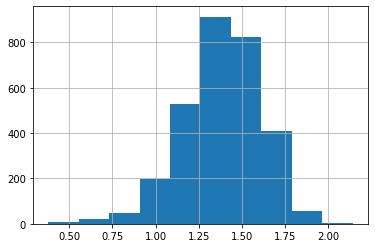

In [71]:
df['success_metric'].hist()

In [72]:
df['success_metric'].describe()

count    3009.000000
mean        1.388252
std         0.225682
min         0.380000
25%         1.250000
50%         1.400000
75%         1.540000
max         2.140000
Name: success_metric, dtype: float64

In [73]:
print(len(df.loc[df['ROI'] < 1.5]))
print(len(df.loc[df['success_metric'] < 1.4]))

1563
1476


In [74]:
df.sort_values('success_metric', ascending= False)

,Title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,script,Metascore,imdbRating,imdbID,ROI_scaled,Metascore_scaled,imdbRating_scaled,success_metric
3094,Mad Max,2015,200000,8750000,99750000,99550000,497.75,"[1, My name is Max., My world is fire and bl...",73.0,6.9,tt0079501,1.000000,0.709677,0.688312,2.14
2831,The Godfather,2014,7000000,134966411,268500000,261500000,37.36,"[While this remains, we hear: ""I believe in ...",100.0,9.2,tt0068646,0.076783,1.000000,0.987013,2.04
1296,Rocky,2011,1000000,117235147,225000000,224000000,224.00,><script><!--/*Break-out-of-frames scriptBy We...,70.0,8.1,tt0075148,0.451051,0.677419,0.844156,2.01
1880,Bambi,2012,858000,102797000,268000000,267142000,311.35,"[<div class=""full-script""><br/>Love is a song ...",91.0,7.3,tt0034492,0.626213,0.903226,0.740260,2.00
815,The Shawshank Redemption,2005,25000000,28241469,28417060,3417060,0.14,If I Didn't Care # If I didn't care # More tha...,80.0,9.3,tt0111161,0.002146,0.784946,1.000000,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,Alone in the Dark,2015,20000000,5178569,10588079,-9411921,-0.47,ALONE IN T...,9.0,2.4,tt0369226,0.000922,0.021505,0.103896,0.48
1492,Son of the Mask,2005,100000000,17018422,59918422,-40081578,-0.40,"[<div class=""full-script""><br/>The Mifulu repr...",20.0,2.2,tt0362165,0.001063,0.139785,0.077922,0.46
2650,Justin Bieber: Never Say Never,2007,13000000,73013910,99034125,86034125,6.62,"[The rings, please?, Oh, God!, - No!, - Oh, my...",52.0,1.6,tt1702443,0.015140,0.483871,0.000000,0.40
2470,Disaster Movie,2010,20000000,14190901,36720752,16720752,0.84,"[Disaster MOVIE, F*ck you!, Did the Wolf Gotch...",15.0,1.9,tt1213644,0.003549,0.086022,0.038961,0.40


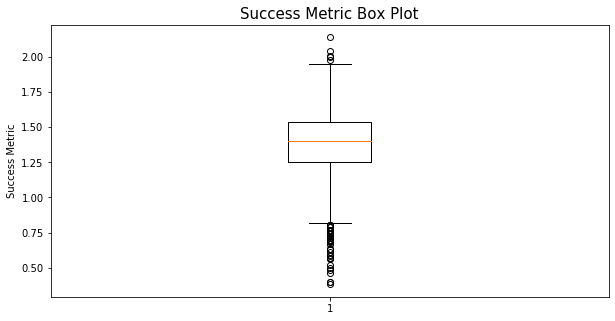

In [75]:
plt.figure(figsize = (10,5))
plt.boxplot(df['success_metric'])
plt.title('Success Metric Box Plot', size = 15)
plt.ylabel('Success Metric', size=10)
plt.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 0 to 83
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3009 non-null   object 
 1   year               3009 non-null   int64  
 2   production_budget  3009 non-null   int64  
 3   domestic_gross     3009 non-null   int64  
 4   worldwide_gross    3009 non-null   int64  
 5   profit             3009 non-null   int64  
 6   ROI                3009 non-null   float64
 7   script             3009 non-null   object 
 8   Metascore          3009 non-null   float64
 9   imdbRating         3009 non-null   float64
 10  imdbID             3009 non-null   object 
 11  ROI_scaled         3009 non-null   float64
 12  Metascore_scaled   3009 non-null   float64
 13  imdbRating_scaled  3009 non-null   float64
 14  success_metric     3009 non-null   float64
dtypes: float64(7), int64(5), object(3)
memory usage: 376.1+ KB


# Script Cleaning

## Clean & Tokenize Scripts Using TextHero

In [77]:
df['script'] = [str(x) for x in df['script']]

## Remove HTML Tags

In [78]:
df['cleaned_scripts'] = df['script'].map(remove_html_tags)

## Clean Scripts Using TextHero

In [79]:
df['cleaned_scripts'] = hero.clean(df['cleaned_scripts'])

## Lemmatize Scripts

In [80]:
df['cleaned_scripts_lemmatize'] = df['cleaned_scripts'].map(lemmatize_token)

In [81]:
df.to_csv('/Users/will4856/Downloads/cleaned_df.csv')
df = pd.read_csv('/Users/will4856/Downloads/cleaned_df.csv', index_col= 'Unnamed: 0')
df.head()

,Title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,script,Metascore,imdbRating,imdbID,ROI_scaled,Metascore_scaled,imdbRating_scaled,success_metric,cleaned_scripts,cleaned_scripts_lemmatize
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,45.0,6.6,tt1298650,0.005394,0.408602,0.649351,1.38,sub edit npdv indoheroes gmail com advertise p...,sub edit npdv indoheroes gmail com advertise p...
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,66.0,7.3,tt2395427,0.007520,0.634409,0.740260,1.56,distant explosion strucker pa report stations ...,distant explosion strucker pa report station i...
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,"There he is! Oh, sorry. Superman, Superman, ca...",45.0,6.4,tt0974015,0.004251,0.408602,0.623377,1.34,oh sorry superman superman ask questions podca...,oh sorry superman superman ask question podcas...
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,"Where are you going? I won't be long. Welcome,...",60.0,6.8,tt2379713,0.005735,0.569892,0.675325,1.45,going long welcome signor soiarra trust pleasa...,going long welcome signor soiarra trust pleasa...
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,There was a time above. A time before. There w...,44.0,6.5,tt2975590,0.006517,0.397849,0.636364,1.36,time time perfect things diamond absolutes thi...,time time perfect thing diamond absolute thing...


# EDA

In [88]:
df = df.loc[df['cleaned_scripts_lemmatize'].notna()]

## Success Metric

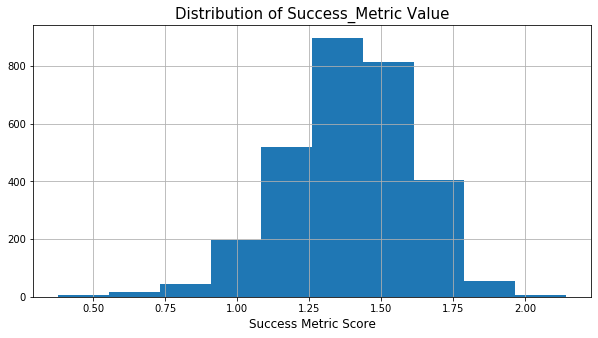

In [89]:
plt.figure(figsize=(10,5))
df['success_metric'].hist()
plt.title('Distribution of Success_Metric Value', size=15)
plt.xlabel('Success Metric Score', size =12)
plt.show()

In [90]:
df['success_metric'].describe()

count    2965.000000
mean        1.389285
std         0.225392
min         0.380000
25%         1.250000
50%         1.400000
75%         1.540000
max         2.140000
Name: success_metric, dtype: float64

In [91]:
df['success_failure'] = [1 if x >= 1.4 else 0 for x in df['success_metric']]
df['success_failure'].value_counts()

functions/clean_lemmatize_token_alt.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1    1516
0    1449
Name: success_failure, dtype: int64

In [102]:
df = df.reset_index(drop=True)

## All Scripts WordCloud

In [69]:
df['word_cloud_scripts'] = df['cleaned_scripts_lemmatize'].map(lambda x: x.split(' '))

In [70]:
df.head()

,Title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,script,Metascore,imdbRating,imdbID,ROI_scaled,Metascore_scaled,imdbRating_scaled,success_metric,cleaned_scripts_lemmatize,success_failure,word_cloud_scripts,word_count
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,45.0,6.6,tt1298650,0.005394,0.408602,0.649351,1.38,sub edit npdv indoheroes gmail com advertise p...,0,"[sub, edit, npdv, indoheroes, gmail, com, adve...",36849
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,66.0,7.3,tt2395427,0.007520,0.634409,0.740260,1.56,distant explosion strucker pa report station i...,1,"[distant, explosion, strucker, pa, report, sta...",53219
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,"There he is! Oh, sorry. Superman, Superman, ca...",45.0,6.4,tt0974015,0.004251,0.408602,0.623377,1.34,oh sorry superman superman ask question podcas...,0,"[oh, sorry, superman, superman, ask, question,...",29830
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,"Where are you going? I won't be long. Welcome,...",60.0,6.8,tt2379713,0.005735,0.569892,0.675325,1.45,going long welcome signor soiarra trust pleasa...,1,"[going, long, welcome, signor, soiarra, trust,...",27741
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,There was a time above. A time before. There w...,44.0,6.5,tt2975590,0.006517,0.397849,0.636364,1.36,time time perfect thing diamond absolute thing...,0,"[time, time, perfect, thing, diamond, absolute...",41537


In [71]:
script_concat = []
for script in df['word_cloud_scripts']:
    script_concat += script
word_cloud_string = ' '.join(script_concat)

In [72]:
script_concat[0]

'sub'

In [54]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(word_cloud_string) 

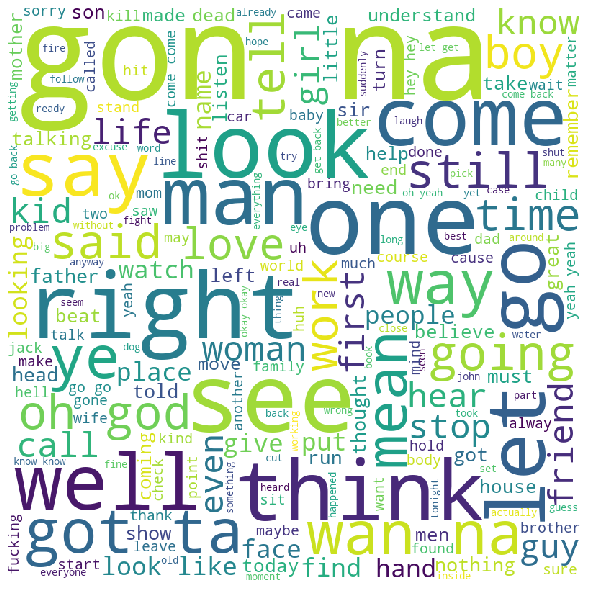

In [55]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

## Success Scripts Word Cloud

In [56]:
script_concat = []
for script in df.loc[df['success_failure'] == 1]['word_cloud_scripts']:
    script_concat += script
word_cloud_string = ' '.join(script_concat)

In [57]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(word_cloud_string) 

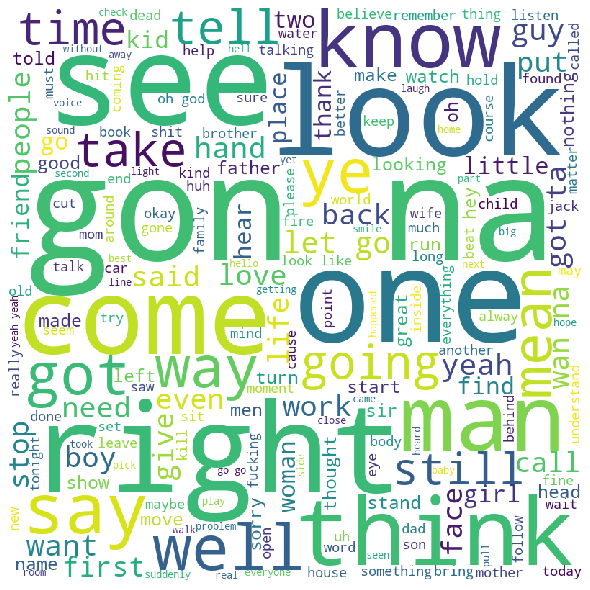

In [58]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

## Failure Scripts Word Cloud

In [61]:
script_concat = []
for script in df.loc[df['success_failure'] == 0]['word_cloud_scripts']:
    script_concat += script
word_cloud_string = ' '.join(script_concat)

In [62]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(word_cloud_string) 

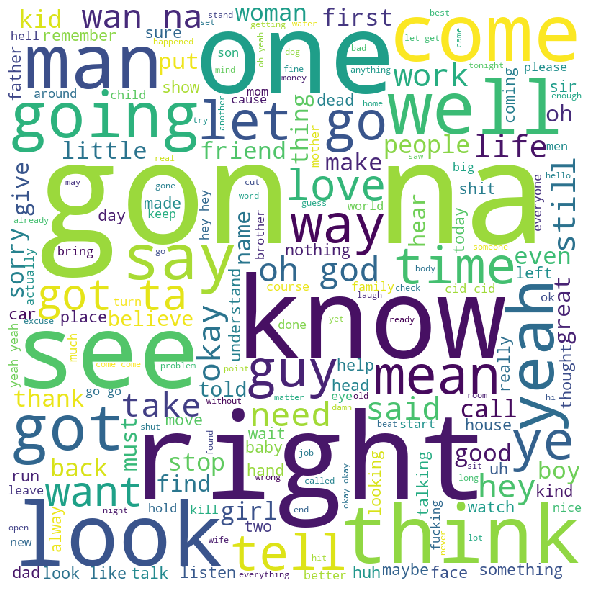

In [63]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

In [64]:
#df.to_csv('/Users/will4856/Downloads/df_additional_eda')
df = pd.read_csv('/Users/will4856/Downloads/df_additional_eda', index_col = 'Unnamed: 0')
df.head()

,Title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,script,Metascore,imdbRating,imdbID,ROI_scaled,Metascore_scaled,imdbRating_scaled,success_metric,cleaned_scripts_lemmatize,success_failure,word_cloud_scripts
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,45.0,6.6,tt1298650,0.005394,0.408602,0.649351,1.38,sub edit npdv indoheroes gmail com advertise p...,0,"['sub', 'edit', 'npdv', 'indoheroes', 'gmail',..."
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,66.0,7.3,tt2395427,0.007520,0.634409,0.740260,1.56,distant explosion strucker pa report station i...,1,"['distant', 'explosion', 'strucker', 'pa', 're..."
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,"There he is! Oh, sorry. Superman, Superman, ca...",45.0,6.4,tt0974015,0.004251,0.408602,0.623377,1.34,oh sorry superman superman ask question podcas...,0,"['oh', 'sorry', 'superman', 'superman', 'ask',..."
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,"Where are you going? I won't be long. Welcome,...",60.0,6.8,tt2379713,0.005735,0.569892,0.675325,1.45,going long welcome signor soiarra trust pleasa...,1,"['going', 'long', 'welcome', 'signor', 'soiarr..."
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,There was a time above. A time before. There w...,44.0,6.5,tt2975590,0.006517,0.397849,0.636364,1.36,time time perfect thing diamond absolute thing...,0,"['time', 'time', 'perfect', 'thing', 'diamond'..."


## Average Word Count Success v. Failure

In [65]:
df['word_count'] = [len(x) for x in df['word_cloud_scripts']]
df.head()

,Title,year,production_budget,domestic_gross,worldwide_gross,profit,ROI,script,Metascore,imdbRating,imdbID,ROI_scaled,Metascore_scaled,imdbRating_scaled,success_metric,cleaned_scripts_lemmatize,success_failure,word_cloud_scripts,word_count
0,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,666663875,1.76,Sub.Re-Edit.by. :: npdv.indoheroes[at]gmail.co...,45.0,6.6,tt1298650,0.005394,0.408602,0.649351,1.38,sub edit npdv indoheroes gmail com advertise p...,0,"['sub', 'edit', 'npdv', 'indoheroes', 'gmail',...",36849
1,Avengers: Age of Ultron,2015,365000000,459005868,1396099202,1031099202,2.82,(DISTANT EXPLOSION) STRUCKER ON PA: Report to ...,66.0,7.3,tt2395427,0.007520,0.634409,0.740260,1.56,distant explosion strucker pa report station i...,1,"['distant', 'explosion', 'strucker', 'pa', 're...",53219
2,Justice League,2017,300000000,229024295,655945209,355945209,1.19,"There he is! Oh, sorry. Superman, Superman, ca...",45.0,6.4,tt0974015,0.004251,0.408602,0.623377,1.34,oh sorry superman superman ask question podcas...,0,"['oh', 'sorry', 'superman', 'superman', 'ask',...",29830
3,Spectre,2015,300000000,200074175,879620923,579620923,1.93,"Where are you going? I won't be long. Welcome,...",60.0,6.8,tt2379713,0.005735,0.569892,0.675325,1.45,going long welcome signor soiarra trust pleasa...,1,"['going', 'long', 'welcome', 'signor', 'soiarr...",27741
4,Batman v Superman: Dawn of Justice,2016,263000000,330360194,872395091,609395091,2.32,There was a time above. A time before. There w...,44.0,6.5,tt2975590,0.006517,0.397849,0.636364,1.36,time time perfect thing diamond absolute thing...,0,"['time', 'time', 'perfect', 'thing', 'diamond'...",41537


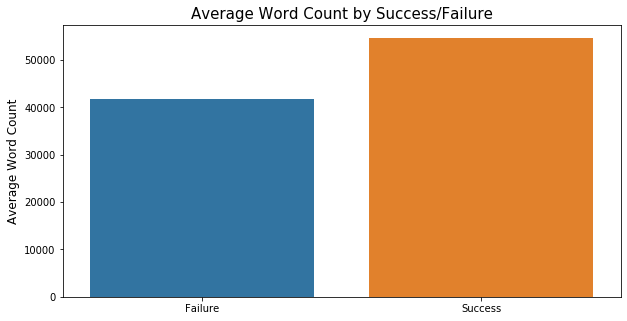

In [66]:
df_s_f = df.groupby('success_failure').mean()
plt.figure(figsize = (10,5))
sns.barplot(data = df_s_f, x = df_s_f.index, y = 'word_count')
plt.title('Average Word Count by Success/Failure', size = 15)
plt.xticks(np.arange(2),['Failure', 'Success'], size = 10)
plt.xlabel(None)
plt.ylabel('Average Word Count', size = 12)
plt.show()

## Average Metascore Success/Failure

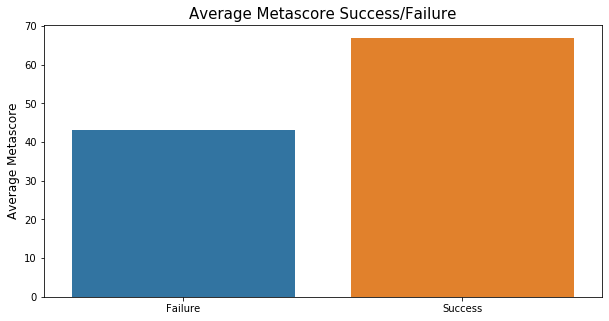

In [67]:
plt.figure(figsize = (10,5))
sns.barplot(data = df_s_f, x = df_s_f.index, y = 'Metascore')
plt.title('Average Metascore Success/Failure', size = 15)
plt.xticks(np.arange(2),['Failure', 'Success'])
plt.xlabel(None)
plt.ylabel('Average Metascore', size = 12)
plt.show()

## Average imdbRating Success/Failure

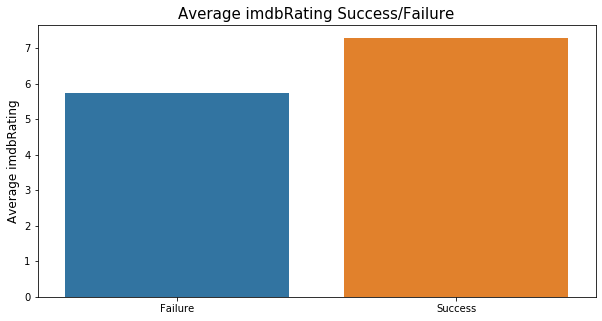

In [68]:
plt.figure(figsize = (10,5))
sns.barplot(data = df_s_f, x = df_s_f.index, y = 'imdbRating')
plt.title('Average imdbRating Success/Failure', size = 15)
plt.xticks(np.arange(2),['Failure', 'Success'])
plt.xlabel(None)
plt.ylabel('Average imdbRating', size = 12)
plt.show()

## Bigrams All Scripts

### Raw Frequency

In [86]:
script_concat = []
script_word_scored_list = []
for script in df['word_cloud_scripts']:
    script_concat += script
bigram_measures = nltk.collocations.BigramAssocMeasures()
word_finder = BigramCollocationFinder.from_words(script_concat)
word_scored = word_finder.score_ngrams(bigram_measures.raw_freq)
script_word_scored_list.append(word_scored)

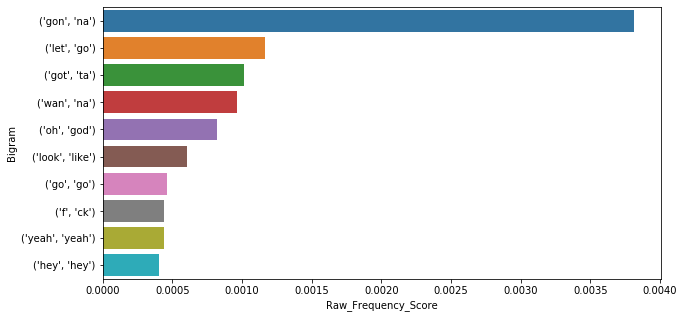

In [87]:
script_bigram_df = pd.DataFrame(script_word_scored_list[0][:10], columns = ['Bigram','Raw_Frequency_Score'])
plt.figure(figsize=(10,5))
sns.barplot(data=script_bigram_df, y='Bigram',x='Raw_Frequency_Score', orient='h')
plt.show()

### Mutual Information Score

In [88]:
script_word_scored_list = []
bigram_measures = nltk.collocations.BigramAssocMeasures()
word_finder.apply_freq_filter(10)
word_scored = word_finder.score_ngrams(bigram_measures.pmi)
script_word_scored_list.append(word_scored)

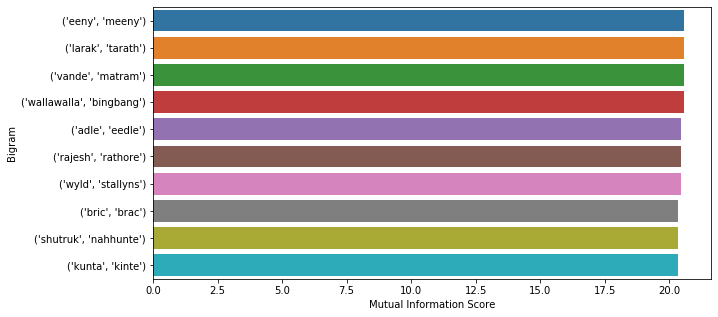

In [89]:
script_bigram_df = pd.DataFrame(script_word_scored_list[0][:10], columns = ['Bigram','Mutual Information Score'])
plt.figure(figsize=(10,5))
sns.barplot(data=script_bigram_df, y='Bigram',x='Mutual Information Score', orient='h')
plt.show()

## Bigrams Success Scripts

### Raw Frequency

In [90]:
script_concat = []
script_word_scored_list = []
for script in df.loc[df['success_failure'] == 1]['word_cloud_scripts']:
    script_concat += script
bigram_measures = nltk.collocations.BigramAssocMeasures()
word_finder = BigramCollocationFinder.from_words(script_concat)
word_scored = word_finder.score_ngrams(bigram_measures.raw_freq)
script_word_scored_list.append(word_scored)

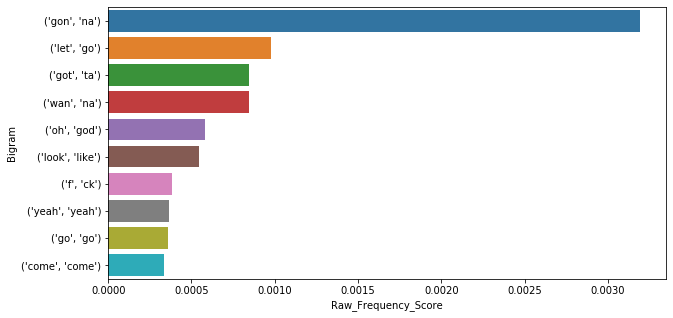

In [91]:
script_bigram_df = pd.DataFrame(script_word_scored_list[0][:10], columns = ['Bigram','Raw_Frequency_Score'])
plt.figure(figsize=(10,5))
sns.barplot(data=script_bigram_df, y='Bigram',x='Raw_Frequency_Score', orient='h')
plt.show()

### Mutual Information Scores

In [92]:
script_word_scored_list = []
bigram_measures = nltk.collocations.BigramAssocMeasures()
word_finder.apply_freq_filter(10)
word_scored = word_finder.score_ngrams(bigram_measures.pmi)
script_word_scored_list.append(word_scored)

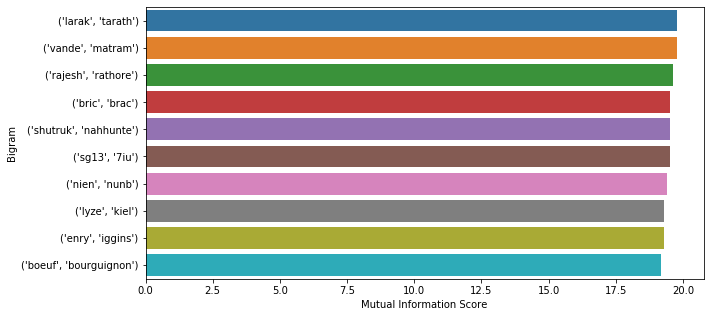

In [93]:
script_bigram_df = pd.DataFrame(script_word_scored_list[0][:10], columns = ['Bigram','Mutual Information Score'])
plt.figure(figsize=(10,5))
sns.barplot(data=script_bigram_df, y='Bigram',x='Mutual Information Score', orient='h')
plt.show()

## Bigrams Failure Scripts

### Raw Frequency Scores

In [96]:
script_concat = []
script_word_scored_list = []
for script in df.loc[df['success_failure'] == 0]['word_cloud_scripts']:
    script_concat += script
bigram_measures = nltk.collocations.BigramAssocMeasures()
word_finder = BigramCollocationFinder.from_words(script_concat)
word_scored = word_finder.score_ngrams(bigram_measures.raw_freq)
script_word_scored_list.append(word_scored)

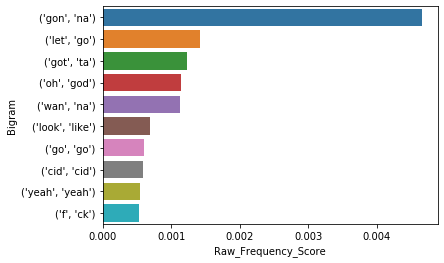

In [97]:
script_bigram_df = pd.DataFrame(script_word_scored_list[0][:10], columns = ['Bigram','Raw_Frequency_Score'])
sns.barplot(data=script_bigram_df, y='Bigram',x='Raw_Frequency_Score', orient='h')

### Mutual Information Scores

In [98]:
script_word_scored_list = []
bigram_measures = nltk.collocations.BigramAssocMeasures()
word_finder.apply_freq_filter(10)
word_scored = word_finder.score_ngrams(bigram_measures.pmi)
script_word_scored_list.append(word_scored)

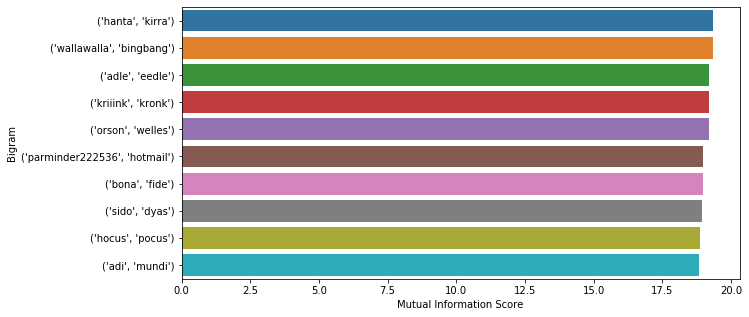

In [99]:
script_bigram_df = pd.DataFrame(script_word_scored_list[0][:10], columns = ['Bigram','Mutual Information Score'])
plt.figure(figsize=(10,5))
sns.barplot(data=script_bigram_df, y='Bigram',x='Mutual Information Score', orient='h')
plt.show()

# Saving Data Frame for Modeling

In [120]:
df = df.drop(columns = ['cleaned_scripts'])

In [121]:
df.to_csv('/Users/will4856/Downloads/modeling_df.csv')